In [353]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf

# Tìm hiểu dữ liệu

In [354]:
df= pd.read_csv(r"C:\Users\Pham Thanh\Downloads\Pollution.csv")
df.head()

,location_id,location_name,co,no2,o3,pm10,pm25,so2,datetimeUtc,datetimeLocal,timezone,latitude,longitude,country_iso,isMobile,isMonitor,owner_name,provider
0,2161312.0,Xuân Tảo,343.0,40.8,NaN,10.8,22.3,NaN,2025-02-01T01:00:00Z,2025-02-01T08:00:00+07:00,Asia/Bangkok,21.2575,105.8514,NaN,NaN,NaN,Unknown Governmental Organization,Hanoi Air Quality Monitoring Network
1,2161312.0,Xuân Tảo,348.3,45.7,NaN,33.7,25.3,NaN,2025-02-01T02:00:00Z,2025-02-01T09:00:00+07:00,Asia/Bangkok,21.2575,105.8514,NaN,NaN,NaN,Unknown Governmental Organization,Hanoi Air Quality Monitoring Network
2,2161312.0,Xuân Tảo,451.5,53.1,NaN,32.2,24.2,NaN,2025-02-01T03:00:00Z,2025-02-01T10:00:00+07:00,Asia/Bangkok,21.2575,105.8514,NaN,NaN,NaN,Unknown Governmental Organization,Hanoi Air Quality Monitoring Network
3,2161312.0,Xuân Tảo,323.2,51.1,NaN,27.0,20.4,NaN,2025-02-01T04:00:00Z,2025-02-01T11:00:00+07:00,Asia/Bangkok,21.2575,105.8514,NaN,NaN,NaN,Unknown Governmental Organization,Hanoi Air Quality Monitoring Network
4,2161312.0,Xuân Tảo,329.8,54.8,NaN,27.1,20.5,NaN,2025-02-01T05:00:00Z,2025-02-01T12:00:00+07:00,Asia/Bangkok,21.2575,105.8514,NaN,NaN,NaN,Unknown Governmental Organization,Hanoi Air Quality Monitoring Network


## Chú thích
1. `location_id`: ID của địa điểm đo (mã định danh duy nhất)
2. `location_name`: Tên của địa điểm đo chất lượng không khí
3. `co, no2, 03, pm10, pm25, so2`: Các chất thải có trong không khí
4. `datetimeUtc`: Thời gian đo theo chuẩn UTC (múi giờ quốc tế)
5. `datetimeLocal`: Thời gian đo theo múi giờ địa phương
6. `timezone`: Múi giờ của địa điểm đo (UTC+7 cho Việt Nam)
7. `latitude và longitude`: Vĩ độ và kinh độ của địa điểm đo
8. `country_iso`: Mã quốc gia theo chuẩn ISO
9. `isMobile`: Thiết bị đo có phải là di động không? (True / False)
10. `isMonitor`: Thiết bị có phải là trạm quan trắc cố định không? (True / False)
11. `owner_name`: Tên chủ sở hữu thiết bị đo
12. `provider`: Nhà cung cấp dữ liệu quan trắc chất lượng không khí

In [355]:
print(df.dtypes)

location_id      float64
location_name     object
co               float64
no2              float64
o3               float64
pm10             float64
pm25             float64
so2              float64
datetimeUtc       object
datetimeLocal     object
timezone          object
latitude         float64
longitude        float64
country_iso      float64
isMobile         float64
isMonitor        float64
owner_name        object
provider          object
dtype: object


In [356]:
dfz = df.copy()
df['datetimeUtc'] = pd.to_datetime(df['datetimeUtc'], errors='coerce')


df['datetimeUtc'] = df['datetimeUtc'].dt.hour.astype('Int64')
df.head(10)

,location_id,location_name,co,no2,o3,pm10,pm25,so2,datetimeUtc,datetimeLocal,timezone,latitude,longitude,country_iso,isMobile,isMonitor,owner_name,provider
0,2161312.0,Xuân Tảo,343.0,40.8,NaN,10.8,22.3,NaN,1,2025-02-01T08:00:00+07:00,Asia/Bangkok,21.2575,105.8514,NaN,NaN,NaN,Unknown Governmental Organization,Hanoi Air Quality Monitoring Network
1,2161312.0,Xuân Tảo,348.3,45.7,NaN,33.7,25.3,NaN,2,2025-02-01T09:00:00+07:00,Asia/Bangkok,21.2575,105.8514,NaN,NaN,NaN,Unknown Governmental Organization,Hanoi Air Quality Monitoring Network
2,2161312.0,Xuân Tảo,451.5,53.1,NaN,32.2,24.2,NaN,3,2025-02-01T10:00:00+07:00,Asia/Bangkok,21.2575,105.8514,NaN,NaN,NaN,Unknown Governmental Organization,Hanoi Air Quality Monitoring Network
3,2161312.0,Xuân Tảo,323.2,51.1,NaN,27.0,20.4,NaN,4,2025-02-01T11:00:00+07:00,Asia/Bangkok,21.2575,105.8514,NaN,NaN,NaN,Unknown Governmental Organization,Hanoi Air Quality Monitoring Network
4,2161312.0,Xuân Tảo,329.8,54.8,NaN,27.1,20.5,NaN,5,2025-02-01T12:00:00+07:00,Asia/Bangkok,21.2575,105.8514,NaN,NaN,NaN,Unknown Governmental Organization,Hanoi Air Quality Monitoring Network
5,2161312.0,Xuân Tảo,275.0,54.4,NaN,28.3,21.3,NaN,6,2025-02-01T13:00:00+07:00,Asia/Bangkok,21.2575,105.8514,NaN,NaN,NaN,Unknown Governmental Organization,Hanoi Air Quality Monitoring Network
6,2161312.0,Xuân Tảo,271.2,56.4,NaN,23.7,17.9,NaN,7,2025-02-01T14:00:00+07:00,Asia/Bangkok,21.2575,105.8514,NaN,NaN,NaN,Unknown Governmental Organization,Hanoi Air Quality Monitoring Network
7,2161312.0,Xuân Tảo,324.9,50.3,NaN,20.8,15.7,NaN,8,2025-02-01T15:00:00+07:00,Asia/Bangkok,21.2575,105.8514,NaN,NaN,NaN,Unknown Governmental Organization,Hanoi Air Quality Monitoring Network
8,2161312.0,Xuân Tảo,396.9,48.4,NaN,19.7,14.9,NaN,9,2025-02-01T16:00:00+07:00,Asia/Bangkok,21.2575,105.8514,NaN,NaN,NaN,Unknown Governmental Organization,Hanoi Air Quality Monitoring Network
9,2161312.0,Xuân Tảo,424.7,53.1,NaN,19.6,14.9,NaN,10,2025-02-01T17:00:00+07:00,Asia/Bangkok,21.2575,105.8514,NaN,NaN,NaN,Unknown Governmental Organization,Hanoi Air Quality Monitoring Network


In [357]:

df.dropna(how='all', inplace=True)


missing_values = df.isnull().sum()
print("Số lượng giá trị thiếu sau khi xóa dòng trắng:\n", missing_values)


print("Kích thước DataFrame sau khi xử lý:", df.shape)

Số lượng giá trị thiếu sau khi xóa dòng trắng:
 location_id         0
location_name       0
co                341
no2               646
o3               3273
pm10              304
pm25              386
so2              3896
datetimeUtc         0
datetimeLocal       0
timezone            0
latitude            0
longitude           0
country_iso      4466
isMobile         4466
isMonitor        4466
owner_name          0
provider            0
dtype: int64
Kích thước DataFrame sau khi xử lý: (4466, 18)


# Xử lí giá trị thiếu 

### Loại bỏ cột có nhiều dữ liệu thiếu

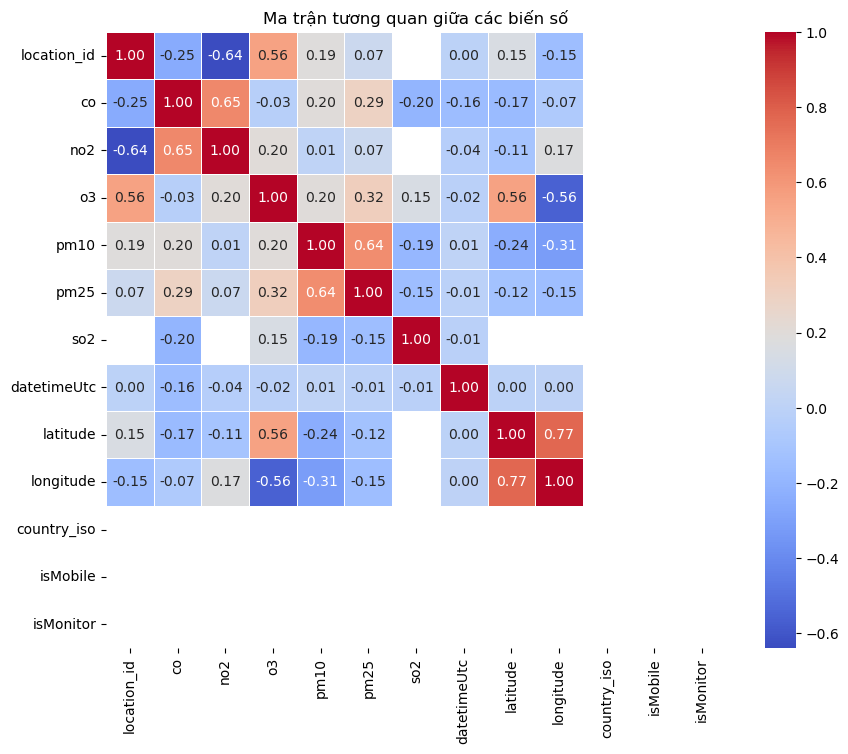

In [358]:
# Tính toán ma trận tương quan giữa các cột số
corr_matrix = df.corr(numeric_only=True)

# Vẽ heatmap biểu diễn ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Ma trận tương quan giữa các biến số")
plt.show()

In [359]:

df.drop(columns=['timezone', 'country_iso', 'isMobile', 'isMonitor', 'owner_name', 'provider', 'datetimeLocal', 'o3', 'so2'], inplace=True)
df.head()

,location_id,location_name,co,no2,pm10,pm25,datetimeUtc,latitude,longitude
0,2161312.0,Xuân Tảo,343.0,40.8,10.8,22.3,1,21.2575,105.8514
1,2161312.0,Xuân Tảo,348.3,45.7,33.7,25.3,2,21.2575,105.8514
2,2161312.0,Xuân Tảo,451.5,53.1,32.2,24.2,3,21.2575,105.8514
3,2161312.0,Xuân Tảo,323.2,51.1,27.0,20.4,4,21.2575,105.8514
4,2161312.0,Xuân Tảo,329.8,54.8,27.1,20.5,5,21.2575,105.8514


### Xử lí bằng giá trị trung bình

In [360]:
df_mean = df.copy()
df_mean.fillna(df_mean.mean(numeric_only=True), inplace=True)

df_mean.head()

,location_id,location_name,co,no2,pm10,pm25,datetimeUtc,latitude,longitude
0,2161312.0,Xuân Tảo,343.0,40.8,10.8,22.3,1,21.2575,105.8514
1,2161312.0,Xuân Tảo,348.3,45.7,33.7,25.3,2,21.2575,105.8514
2,2161312.0,Xuân Tảo,451.5,53.1,32.2,24.2,3,21.2575,105.8514
3,2161312.0,Xuân Tảo,323.2,51.1,27.0,20.4,4,21.2575,105.8514
4,2161312.0,Xuân Tảo,329.8,54.8,27.1,20.5,5,21.2575,105.8514


In [361]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


def evaluate_model(df, method_name, target_columns):
    results = {}

    for target_column in target_columns:
        df_processed = df.copy()

        for col in df_processed.select_dtypes(include=['object']).columns:
            le = LabelEncoder()
            df_processed[col] = le.fit_transform(df_processed[col])


        X = df_processed.drop(columns=[target_column])
        y = df_processed[target_column]


        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


        model = LinearRegression()
        model.fit(X_train, y_train)


        y_pred = model.predict(X_test)

        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        results[target_column] = {"R²": r2, "MSE": mse, "MAE": mae}

    for key, value in results.items():
        print(f"Đánh giá mô hình cho cột '{key}':")
        print(f"  - R²: {value['R²']:.4f}")
        print(f"  - MSE: {value['MSE']:.4f}")
        print(f"  - MAE: {value['MAE']:.4f}")
        print("-" * 40)

    return results

df_mean = df.copy()
df_mean.fillna(df_mean.mean(numeric_only=True), inplace=True)


target_columns = ['co', 'no2', 'pm10', 'pm25']

evaluate_model(df_mean, "thay thế bằng giá trị trung bình", target_columns)

Đánh giá mô hình cho cột 'co':
  - R²: 0.3010
  - MSE: 246073.0578
  - MAE: 315.3185
----------------------------------------
Đánh giá mô hình cho cột 'no2':
  - R²: 0.5632
  - MSE: 326.0977
  - MAE: 14.1567
----------------------------------------
Đánh giá mô hình cho cột 'pm10':
  - R²: 0.3088
  - MSE: 1964.1388
  - MAE: 18.7174
----------------------------------------
Đánh giá mô hình cho cột 'pm25':
  - R²: 0.2649
  - MSE: 577.0004
  - MAE: 14.4504
----------------------------------------


{'co': {'R²': 0.3010093003321548,
  'MSE': 246073.05777229235,
  'MAE': 315.31849132028304},
 'no2': {'R²': 0.5632093618305793,
  'MSE': 326.0977408338611,
  'MAE': 14.156686395131514},
 'pm10': {'R²': 0.30875902376649367,
  'MSE': 1964.1387686423475,
  'MAE': 18.717381488497484},
 'pm25': {'R²': 0.2648966815776733,
  'MSE': 577.0004032934593,
  'MAE': 14.450403657808618}}

### Xử lí bằng giá trị trung vị

In [362]:

df_median = df.copy()
df_median.fillna(df_median.median(numeric_only=True), inplace=True)

df_median.head(10)

,location_id,location_name,co,no2,pm10,pm25,datetimeUtc,latitude,longitude
0,2161312.0,Xuân Tảo,343.0,40.8,10.8,22.3,1,21.2575,105.8514
1,2161312.0,Xuân Tảo,348.3,45.7,33.7,25.3,2,21.2575,105.8514
2,2161312.0,Xuân Tảo,451.5,53.1,32.2,24.2,3,21.2575,105.8514
3,2161312.0,Xuân Tảo,323.2,51.1,27.0,20.4,4,21.2575,105.8514
4,2161312.0,Xuân Tảo,329.8,54.8,27.1,20.5,5,21.2575,105.8514
5,2161312.0,Xuân Tảo,275.0,54.4,28.3,21.3,6,21.2575,105.8514
6,2161312.0,Xuân Tảo,271.2,56.4,23.7,17.9,7,21.2575,105.8514
7,2161312.0,Xuân Tảo,324.9,50.3,20.8,15.7,8,21.2575,105.8514
8,2161312.0,Xuân Tảo,396.9,48.4,19.7,14.9,9,21.2575,105.8514
9,2161312.0,Xuân Tảo,424.7,53.1,19.6,14.9,10,21.2575,105.8514


In [363]:



def evaluate_model(df, method_name, target_columns):
    results = {}

    for target_column in target_columns:
        df_processed = df.copy()


        for col in df_processed.select_dtypes(include=['object']).columns:
            le = LabelEncoder()
            df_processed[col] = le.fit_transform(df_processed[col])

        X = df_processed.drop(columns=[target_column])
        y = df_processed[target_column]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


        model = LinearRegression()
        model.fit(X_train, y_train)


        y_pred = model.predict(X_test)

        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        results[target_column] = {"R²": r2, "MSE": mse, "MAE": mae}

    for key, value in results.items():
        print(f"Đánh giá mô hình ({method_name}) cho cột '{key}':")
        print(f"  - R²: {value['R²']:.4f}")
        print(f"  - MSE: {value['MSE']:.4f}")
        print(f"  - MAE: {value['MAE']:.4f}")
        print("-" * 40)

    return results


df_median = df.copy()
df_median.fillna(df_median.median(numeric_only=True), inplace=True)
evaluate_model(df_median, "thay thế bằng giá trị trung vị", target_columns)

Đánh giá mô hình (thay thế bằng giá trị trung vị) cho cột 'co':
  - R²: 0.2433
  - MSE: 267692.0254
  - MAE: 333.4140
----------------------------------------
Đánh giá mô hình (thay thế bằng giá trị trung vị) cho cột 'no2':
  - R²: 0.5327
  - MSE: 353.9411
  - MAE: 14.8922
----------------------------------------
Đánh giá mô hình (thay thế bằng giá trị trung vị) cho cột 'pm10':
  - R²: 0.3018
  - MSE: 1993.9222
  - MAE: 19.0469
----------------------------------------
Đánh giá mô hình (thay thế bằng giá trị trung vị) cho cột 'pm25':
  - R²: 0.2612
  - MSE: 583.0861
  - MAE: 14.4786
----------------------------------------


{'co': {'R²': 0.24327426100108274,
  'MSE': 267692.02538385225,
  'MAE': 333.4139539438682},
 'no2': {'R²': 0.532652610237496,
  'MSE': 353.94113637169164,
  'MAE': 14.892182681049352},
 'pm10': {'R²': 0.30179451273320845,
  'MSE': 1993.9221837075872,
  'MAE': 19.04691588090885},
 'pm25': {'R²': 0.26117440273176573,
  'MSE': 583.0861090833318,
  'MAE': 14.47860487140677}}

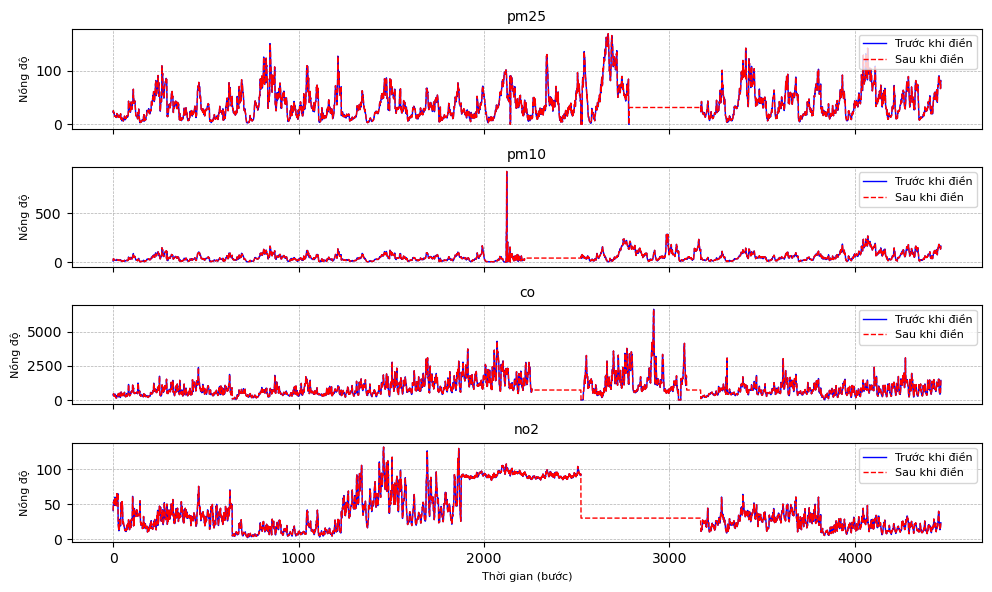

In [364]:
import matplotlib.pyplot as plt

pollutants = ["pm25", "pm10", "co", "no2"]

fig, axes = plt.subplots(4, 1, figsize=(10, 6), sharex=True)

for i, ax in enumerate(axes):
    pollutant = pollutants[i]
    y_real = df[pollutant]
    y_filled = df_median[pollutant]

    ax.plot(range(len(y_real)), y_real, label="Trước khi điền", color="blue", linewidth=1)
    ax.plot(range(len(y_filled)), y_filled, label="Sau khi điền", color="red", linestyle="dashed", linewidth=1)

    ax.set_title(f"{pollutant}", fontsize=10)
    ax.set_ylabel("Nồng độ", fontsize=8)
    ax.legend(fontsize=8, loc="upper right")
    ax.grid(True, linestyle="--", linewidth=0.5)

axes[-1].set_xlabel("Thời gian (bước)", fontsize=8)

plt.tight_layout(pad=1.0)
plt.show()


### Xử lí bằng giá trị phổ biến

In [365]:

df_mode = df.copy()


for column in df_mode.columns:
    if df_mode[column].isnull().sum() > 0:
        mode_value = df_mode[column].mode().dropna()
        if not mode_value.empty:
            df_mode[column].fillna(mode_value.iloc[0], inplace=True)
        else:
            print(f"Cột {column} không có mode hợp lệ, giữ nguyên giá trị NaN.")


df_mode.head(10)


C:\Users\Pham Thanh\AppData\Local\Temp\ipykernel_16120\2777045096.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mode[column].fillna(mode_value.iloc[0], inplace=True)


,location_id,location_name,co,no2,pm10,pm25,datetimeUtc,latitude,longitude
0,2161312.0,Xuân Tảo,343.0,40.8,10.8,22.3,1,21.2575,105.8514
1,2161312.0,Xuân Tảo,348.3,45.7,33.7,25.3,2,21.2575,105.8514
2,2161312.0,Xuân Tảo,451.5,53.1,32.2,24.2,3,21.2575,105.8514
3,2161312.0,Xuân Tảo,323.2,51.1,27.0,20.4,4,21.2575,105.8514
4,2161312.0,Xuân Tảo,329.8,54.8,27.1,20.5,5,21.2575,105.8514
5,2161312.0,Xuân Tảo,275.0,54.4,28.3,21.3,6,21.2575,105.8514
6,2161312.0,Xuân Tảo,271.2,56.4,23.7,17.9,7,21.2575,105.8514
7,2161312.0,Xuân Tảo,324.9,50.3,20.8,15.7,8,21.2575,105.8514
8,2161312.0,Xuân Tảo,396.9,48.4,19.7,14.9,9,21.2575,105.8514
9,2161312.0,Xuân Tảo,424.7,53.1,19.6,14.9,10,21.2575,105.8514


In [366]:


def evaluate_model(df, method_name, target_columns):
    results = {}

    for target_column in target_columns:
        df_processed = df.copy()

        # Mã hóa các cột chứa dữ liệu dạng chuỗi
        for col in df_processed.select_dtypes(include=['object']).columns:
            le = LabelEncoder()
            df_processed[col] = le.fit_transform(df_processed[col])

        # Chia tập dữ liệu thành X (đầu vào) và y (đầu ra)
        X = df_processed.drop(columns=[target_column])
        y = df_processed[target_column]

        # Chia dữ liệu thành tập huấn luyện và kiểm tra
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Huấn luyện mô hình hồi quy tuyến tính
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Dự đoán trên tập kiểm tra
        y_pred = model.predict(X_test)

        # Tính R^2 score, MSE, MAE
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        results[target_column] = {"R²": r2, "MSE": mse, "MAE": mae}

    for key, value in results.items():
        print(f"Đánh giá mô hình ({method_name}) cho cột '{key}':")
        print(f"  - R²: {value['R²']:.4f}")
        print(f"  - MSE: {value['MSE']:.4f}")
        print(f"  - MAE: {value['MAE']:.4f}")
        print("-" * 40)

    return results

# Xử lý missing data bằng phương pháp Mode
df_mode = df.copy()
for column in df_mode.columns:
    if df_mode[column].isnull().sum() > 0:
        mode_value = df_mode[column].mode().dropna()
        if not mode_value.empty:
            df_mode[column].fillna(mode_value.iloc[0], inplace=True)
        else:
            print(f"Cột {column} không có mode hợp lệ, giữ nguyên giá trị NaN.")

evaluate_model(df_mode, "thay thế bằng giá trị mode", target_columns)

Đánh giá mô hình (thay thế bằng giá trị mode) cho cột 'co':
  - R²: 0.1279
  - MSE: 355403.2877
  - MAE: 386.1112
----------------------------------------
Đánh giá mô hình (thay thế bằng giá trị mode) cho cột 'no2':
  - R²: 0.4805
  - MSE: 408.6513
  - MAE: 16.2929
----------------------------------------
Đánh giá mô hình (thay thế bằng giá trị mode) cho cột 'pm10':
  - R²: 0.2851
  - MSE: 2106.5171
  - MAE: 21.1240
----------------------------------------
Đánh giá mô hình (thay thế bằng giá trị mode) cho cột 'pm25':
  - R²: 0.2436
  - MSE: 625.8922
  - MAE: 15.3508
----------------------------------------


C:\Users\Pham Thanh\AppData\Local\Temp\ipykernel_16120\2260927372.py:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mode[column].fillna(mode_value.iloc[0], inplace=True)


{'co': {'R²': 0.12791658817491558,
  'MSE': 355403.287703017,
  'MAE': 386.11116774330577},
 'no2': {'R²': 0.48049298683354436,
  'MSE': 408.6513182383262,
  'MAE': 16.292859151232882},
 'pm10': {'R²': 0.28507665824630757,
  'MSE': 2106.5170745925507,
  'MAE': 21.1239891011817},
 'pm25': {'R²': 0.24363770055949485,
  'MSE': 625.892212131258,
  'MAE': 15.35080381668479}}

### Xử lí bằng phương pháp IDW kết hợp trung vị

In [367]:
from scipy.spatial import cKDTree

df_idw = df.copy()


df_idw.dropna(how='all', inplace=True)


print("Số lượng giá trị thiếu trước khi xử lý:\n", df_idw.isnull().sum())

def idw_median_imputation_fixed(df, target_col, k=5):
    """Kết hợp IDW và trung vị để điền dữ liệu thiếu với xử lý lỗi."""
    known = df[df[target_col].notnull()]
    unknown = df[df[target_col].isnull()]

    if unknown.empty:
        print(f" Không có giá trị thiếu trong {target_col}.")
        return df
    if known.empty:
        print(f" Không có dữ liệu hợp lệ để nội suy {target_col}, thay thế toàn bộ bằng trung vị.")
        median_value = 0
        df[target_col].fillna(median_value, inplace=True)
        return df

    coords_known = known[['latitude', 'longitude']].values
    coords_unknown = unknown[['latitude', 'longitude']].values

    tree = cKDTree(coords_known)
    k = min(k, len(coords_known))
    dists, idxs = tree.query(coords_unknown, k=k)

    dists[dists == 0] = 1e-10
    valid_mask = np.isfinite(dists).all(axis=1)

    interpolated_values = np.full(len(unknown), np.nan)


    if valid_mask.any():
        weights = 1 / dists[valid_mask]
        weights /= np.sum(weights, axis=1, keepdims=True)
        interpolated_values[valid_mask] = np.sum(weights * known[target_col].values[idxs[valid_mask]], axis=1)

    median_value = known[target_col].median()
    if np.isnan(median_value):
        print(f"Trung vị của {target_col} là NaN, thay thế bằng 0.")
        median_value = 0
    interpolated_values[np.isnan(interpolated_values)] = median_value

    df.loc[df[target_col].isnull(), target_col] = interpolated_values

    return df


columns_to_fill = ["co", "no2", "pm10", "pm25"]
df_final = df_idw.copy()

for col in columns_to_fill:
    print(f"Xử lý nội suy cho {col}...")
    df_final = idw_median_imputation_fixed(df_final, col)

print("Số lượng giá trị thiếu sau khi xử lý:\n", df_final.isnull().sum())

df_final.to_csv("Data_Filled_IDW_Median.csv", index=False)

df_final.head(10)


Số lượng giá trị thiếu trước khi xử lý:
 location_id        0
location_name      0
co               341
no2              646
pm10             304
pm25             386
datetimeUtc        0
latitude           0
longitude          0
dtype: int64
Xử lý nội suy cho co...
Xử lý nội suy cho no2...
Xử lý nội suy cho pm10...
Xử lý nội suy cho pm25...
Số lượng giá trị thiếu sau khi xử lý:
 location_id      0
location_name    0
co               0
no2              0
pm10             0
pm25             0
datetimeUtc      0
latitude         0
longitude        0
dtype: int64


,location_id,location_name,co,no2,pm10,pm25,datetimeUtc,latitude,longitude
0,2161312.0,Xuân Tảo,343.0,40.8,10.8,22.3,1,21.2575,105.8514
1,2161312.0,Xuân Tảo,348.3,45.7,33.7,25.3,2,21.2575,105.8514
2,2161312.0,Xuân Tảo,451.5,53.1,32.2,24.2,3,21.2575,105.8514
3,2161312.0,Xuân Tảo,323.2,51.1,27.0,20.4,4,21.2575,105.8514
4,2161312.0,Xuân Tảo,329.8,54.8,27.1,20.5,5,21.2575,105.8514
5,2161312.0,Xuân Tảo,275.0,54.4,28.3,21.3,6,21.2575,105.8514
6,2161312.0,Xuân Tảo,271.2,56.4,23.7,17.9,7,21.2575,105.8514
7,2161312.0,Xuân Tảo,324.9,50.3,20.8,15.7,8,21.2575,105.8514
8,2161312.0,Xuân Tảo,396.9,48.4,19.7,14.9,9,21.2575,105.8514
9,2161312.0,Xuân Tảo,424.7,53.1,19.6,14.9,10,21.2575,105.8514


In [368]:
def evaluate_model(df, method_name, target_columns):
    results = {}

    for target_column in target_columns:
        df_processed = df.copy()


        for col in df_processed.select_dtypes(include=['object']).columns:
            le = LabelEncoder()
            df_processed[col] = le.fit_transform(df_processed[col])


        X = df_processed.drop(columns=[target_column])
        y = df_processed[target_column]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


        model = LinearRegression()
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)


        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        results[target_column] = {"R²": r2, "MSE": mse, "MAE": mae}

    for key, value in results.items():
        print(f"Đánh giá mô hình ({method_name}) cho cột '{key}':")
        print(f"  - R²: {value['R²']:.4f}")
        print(f"  - MSE: {value['MSE']:.4f}")
        print(f"  - MAE: {value['MAE']:.4f}")
        print("-" * 40)

    return results


def idw_median_imputation_fixed(df, target_col, k=5):
    known = df[df[target_col].notnull()]
    unknown = df[df[target_col].isnull()]

    if unknown.empty:
        print(f"Không có giá trị thiếu trong {target_col}.")
        return df
    if known.empty:
        print(f"Không có dữ liệu hợp lệ để nội suy {target_col}, thay thế toàn bộ bằng trung vị.")
        median_value = 0
        df[target_col].fillna(median_value, inplace=True)
        return df

    coords_known = known[['latitude', 'longitude']].values
    coords_unknown = unknown[['latitude', 'longitude']].values

    tree = cKDTree(coords_known)
    k = min(k, len(coords_known))
    dists, idxs = tree.query(coords_unknown, k=k)

    dists[dists == 0] = 1e-10
    valid_mask = np.isfinite(dists).all(axis=1)

    interpolated_values = np.full(len(unknown), np.nan)

    if valid_mask.any():
        weights = 1 / dists[valid_mask]
        weights /= np.sum(weights, axis=1, keepdims=True)
        interpolated_values[valid_mask] = np.sum(weights * known[target_col].values[idxs[valid_mask]], axis=1)

    median_value = known[target_col].median()
    if np.isnan(median_value):
        median_value = 0
    interpolated_values[np.isnan(interpolated_values)] = median_value

    df.loc[df[target_col].isnull(), target_col] = interpolated_values

    return df

df_idw = df.copy()
columns_to_fill = ["co", "no2", "pm10", "pm25"]

for col in columns_to_fill:

    df_idw = idw_median_imputation_fixed(df_idw, col)

evaluate_model(df_idw, "nội suy IDW + Trung vị", columns_to_fill)


Đánh giá mô hình (nội suy IDW + Trung vị) cho cột 'co':
  - R²: 0.2611
  - MSE: 260519.8992
  - MAE: 328.7692
----------------------------------------
Đánh giá mô hình (nội suy IDW + Trung vị) cho cột 'no2':
  - R²: 0.5393
  - MSE: 349.1919
  - MAE: 14.7482
----------------------------------------
Đánh giá mô hình (nội suy IDW + Trung vị) cho cột 'pm10':
  - R²: 0.2970
  - MSE: 2030.6085
  - MAE: 19.6471
----------------------------------------
Đánh giá mô hình (nội suy IDW + Trung vị) cho cột 'pm25':
  - R²: 0.2517
  - MSE: 598.3385
  - MAE: 14.7795
----------------------------------------


{'co': {'R²': 0.26108998254875304,
  'MSE': 260519.8991995429,
  'MAE': 328.76918047969986},
 'no2': {'R²': 0.5393305925095986,
  'MSE': 349.19187920889686,
  'MAE': 14.748227970367713},
 'pm10': {'R²': 0.2970470161614346,
  'MSE': 2030.6084790880466,
  'MAE': 19.64708404027527},
 'pm25': {'R²': 0.2517221344224022,
  'MSE': 598.3384745898422,
  'MAE': 14.77954405870348}}

IDW (Nội suy trọng số nghịch đảo khoảng cách) là một phương pháp nội suy không gian, trong đó giá trị của một điểm cần dự đoán được tính dựa trên các điểm lân cận có giá trị đã biết.

Để khắc phục nhược điểm của IDW, ta kết hợp thêm trung vị để xử lý các trường hợp đặc biệt:

1.Áp dụng IDW để nội suy dữ liệu còn thiếu.

2.Nếu IDW thất bại (do lỗi ma trận hoặc thiếu dữ liệu lân cận):
    Điền giá trị bị thiếu bằng trung vị của dữ liệu đã có trong cột đó.

### Sử dụng RandomForest để điền dữ liệu thiếu

In [369]:
from sklearn.ensemble import RandomForestRegressor
df_radom = df.copy()

datetime_col = dfz["datetimeUtc"]
original_location_name = df["location_name"].copy()

missing_columns = df_radom.columns[df_radom.isnull().any()].tolist()


categorical_cols = df_radom.select_dtypes(include=['object']).columns.tolist()


label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_radom[col] = le.fit_transform(df_radom[col].astype(str))
    label_encoders[col] = le

evaluation_results = {}


for col in missing_columns:
    df_complete = df_radom.dropna()

    if df_complete.empty:
        continue

    X = df_complete.drop(columns=[col])
    y = df_complete[col]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)


    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    evaluation_results[col] = {"R²": r2, "MSE": mse, "MAE": mae}


    missing_mask = df_radom[col].isnull()
    df_radom.loc[missing_mask, col] = rf.predict(df_radom.loc[missing_mask].drop(columns=[col]))


df_radom["datetimeUtc"] = datetime_col

df_radom["location_name"] = original_location_name

for col, metrics in evaluation_results.items():
    print(f"Đánh giá mô hình cho cột '{col}':")
    print(f"  - R²: {metrics['R²']:.4f}")
    print(f"  - MSE: {metrics['MSE']:.4f}")
    print(f"  - MAE: {metrics['MAE']:.4f}")
    print("-" * 40)


print("Số lượng giá trị thiếu sau khi điền:")
print(df_radom.isnull().sum())

df_radom.head()


Đánh giá mô hình cho cột 'co':
  - R²: 0.7224
  - MSE: 73582.6354
  - MAE: 178.2348
----------------------------------------
Đánh giá mô hình cho cột 'no2':
  - R²: 0.9050
  - MSE: 57.9938
  - MAE: 5.1858
----------------------------------------
Đánh giá mô hình cho cột 'pm10':
  - R²: 0.8772
  - MSE: 225.1477
  - MAE: 5.0677
----------------------------------------
Đánh giá mô hình cho cột 'pm25':
  - R²: 0.8589
  - MSE: 102.4835
  - MAE: 3.5599
----------------------------------------
Số lượng giá trị thiếu sau khi điền:
location_id      0
location_name    0
co               0
no2              0
pm10             0
pm25             0
datetimeUtc      0
latitude         0
longitude        0
dtype: int64


,location_id,location_name,co,no2,pm10,pm25,datetimeUtc,latitude,longitude
0,2161312.0,Xuân Tảo,343.0,40.8,10.8,22.3,2025-02-01T01:00:00Z,21.2575,105.8514
1,2161312.0,Xuân Tảo,348.3,45.7,33.7,25.3,2025-02-01T02:00:00Z,21.2575,105.8514
2,2161312.0,Xuân Tảo,451.5,53.1,32.2,24.2,2025-02-01T03:00:00Z,21.2575,105.8514
3,2161312.0,Xuân Tảo,323.2,51.1,27.0,20.4,2025-02-01T04:00:00Z,21.2575,105.8514
4,2161312.0,Xuân Tảo,329.8,54.8,27.1,20.5,2025-02-01T05:00:00Z,21.2575,105.8514


In [370]:
df1 = df_radom.copy()

df1["datetimeUtc"] = pd.to_datetime(df1["datetimeUtc"])
df1["year"] = df1["datetimeUtc"].dt.year
df1["month"] = df1["datetimeUtc"].dt.month
df1["day"] = df1["datetimeUtc"].dt.day
df1["hour"] = df1["datetimeUtc"].dt.hour
df1["weekday"] = df1["datetimeUtc"].dt.weekday


le = LabelEncoder()
df1["location_name"] = le.fit_transform(df1["location_name"])

def create_lag_features(df, targets, n_lags=3):
    df1 = df.copy()
    for col in targets:
        for lag in range(1, n_lags + 1):
            df1[f"{col}_lag{lag}"] = df1[col].shift(lag)
    return df1.dropna()


targets = ["pm25", "pm10", "co", "no2"]
df1 = create_lag_features(df1, targets, n_lags=3)


features = ["year", "month", "day", "hour", "weekday", "location_name"]
features += [f"{col}_lag{i}" for col in targets for i in range(1, 4)]


models = {}
results = {}

for target in targets:
    X = df1[features]
    y = df1[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    models[target] = model

    y_pred = model.predict(X_test)
    results[target] = {
        "R²": r2_score(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
    }


for key, value in results.items():
    print(f"Đánh giá mô hình cho {key}:")
    print(f"  - R²: {value['R²']:.4f}")
    print(f"  - MSE: {value['MSE']:.4f}")
    print(f"  - MAE: {value['MAE']:.4f}")
    print("-" * 40)
df.head()

Đánh giá mô hình cho pm25:
  - R²: 0.9272
  - MSE: 67.5758
  - MAE: 5.0338
----------------------------------------
Đánh giá mô hình cho pm10:
  - R²: 0.9067
  - MSE: 160.5749
  - MAE: 7.6128
----------------------------------------
Đánh giá mô hình cho co:
  - R²: 0.8861
  - MSE: 40866.6255
  - MAE: 131.6490
----------------------------------------
Đánh giá mô hình cho no2:
  - R²: 0.9746
  - MSE: 19.5835
  - MAE: 2.8393
----------------------------------------


,location_id,location_name,co,no2,pm10,pm25,datetimeUtc,latitude,longitude
0,2161312.0,Xuân Tảo,343.0,40.8,10.8,22.3,1,21.2575,105.8514
1,2161312.0,Xuân Tảo,348.3,45.7,33.7,25.3,2,21.2575,105.8514
2,2161312.0,Xuân Tảo,451.5,53.1,32.2,24.2,3,21.2575,105.8514
3,2161312.0,Xuân Tảo,323.2,51.1,27.0,20.4,4,21.2575,105.8514
4,2161312.0,Xuân Tảo,329.8,54.8,27.1,20.5,5,21.2575,105.8514


### Sử dụng LinearRegression để điền dữ liệu thiếu

In [371]:

from sklearn.impute import SimpleImputer

df_linear = df.copy()


datetime_col = dfz["datetimeUtc"]
original_location_name = df["location_name"].copy()


missing_columns = df_linear.columns[df_linear.isnull().any()].tolist()


categorical_cols = df_linear.select_dtypes(include=['object']).columns.tolist()


label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_linear[col] = le.fit_transform(df_linear[col].astype(str))
    label_encoders[col] = le


evaluation_results = {}


for col in missing_columns:
    df_complete = df_linear.dropna()

    if df_complete.empty:
        continue


    X = df_complete.drop(columns=[col])
    y = df_complete[col]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    lr = LinearRegression()
    lr.fit(X_train, y_train)


    y_pred = lr.predict(X_test)


    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)


    evaluation_results[col] = {"R²": r2, "MSE": mse, "MAE": mae}


    missing_mask = df_linear[col].isnull()

    imputer = SimpleImputer(strategy='mean')
    X_missing = df_linear.loc[missing_mask].drop(columns=[col])
    X_missing_imputed = imputer.fit_transform(X_missing)

    df_linear.loc[missing_mask, col] = lr.predict(X_missing_imputed)



df_linear["datetimeUtc"] = datetime_col

df_linear["location_name"] = original_location_name

for col, metrics in evaluation_results.items():
    print(f"Đánh giá mô hình cho cột '{col}':")
    print(f"  - R²: {metrics['R²']:.4f}")
    print(f"  - MSE: {metrics['MSE']:.4f}")
    print(f"  - MAE: {metrics['MAE']:.4f}")
    print("-" * 40)


print("Số lượng giá trị thiếu sau khi điền:")
print(df_linear.isnull().sum())

df_linear.head()

Đánh giá mô hình cho cột 'co':
  - R²: 0.4946
  - MSE: 133960.9929
  - MAE: 244.1181
----------------------------------------
Đánh giá mô hình cho cột 'no2':
  - R²: 0.6294
  - MSE: 226.1328
  - MAE: 10.7726
----------------------------------------
Đánh giá mô hình cho cột 'pm10':
  - R²: 0.6318
  - MSE: 674.8207
  - MAE: 13.0905
----------------------------------------
Đánh giá mô hình cho cột 'pm25':
  - R²: 0.5620
  - MSE: 318.1308
  - MAE: 11.6875
----------------------------------------
Số lượng giá trị thiếu sau khi điền:
location_id      0
location_name    0
co               0
no2              0
pm10             0
pm25             0
datetimeUtc      0
latitude         0
longitude        0
dtype: int64


D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,location_id,location_name,co,no2,pm10,pm25,datetimeUtc,latitude,longitude
0,2161312.0,Xuân Tảo,343.0,40.8,10.8,22.3,2025-02-01T01:00:00Z,21.2575,105.8514
1,2161312.0,Xuân Tảo,348.3,45.7,33.7,25.3,2025-02-01T02:00:00Z,21.2575,105.8514
2,2161312.0,Xuân Tảo,451.5,53.1,32.2,24.2,2025-02-01T03:00:00Z,21.2575,105.8514
3,2161312.0,Xuân Tảo,323.2,51.1,27.0,20.4,2025-02-01T04:00:00Z,21.2575,105.8514
4,2161312.0,Xuân Tảo,329.8,54.8,27.1,20.5,2025-02-01T05:00:00Z,21.2575,105.8514


In [372]:
df2 = df_linear.copy()


df2["datetimeUtc"] = pd.to_datetime(df2["datetimeUtc"])
df2["year"] = df2["datetimeUtc"].dt.year
df2["month"] = df2["datetimeUtc"].dt.month
df2["day"] = df2["datetimeUtc"].dt.day
df2["hour"] = df2["datetimeUtc"].dt.hour
df2["weekday"] = df2["datetimeUtc"].dt.weekday


le = LabelEncoder()
df2["location_name"] = le.fit_transform(df2["location_name"])


def create_lag_features(df, targets, n_lags=3):
    df2 = df.copy()
    for col in targets:
        for lag in range(1, n_lags + 1):
            df2[f"{col}_lag{lag}"] = df2[col].shift(lag)
    return df2.dropna()


targets = ["pm25", "pm10", "co", "no2"]
df2 = create_lag_features(df2, targets, n_lags=3)

features = ["year", "month", "day", "hour", "weekday", "location_name"]
features += [f"{col}_lag{i}" for col in targets for i in range(1, 4)]


models = {}
results = {}

for target in targets:
    X = df2[features]
    y = df2[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    models[target] = model

    y_pred = model.predict(X_test)
    results[target] = {
        "R²": r2_score(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
    }


for key, value in results.items():
    print(f"Đánh giá mô hình cho {key}:")
    print(f"  - R²: {value['R²']:.4f}")
    print(f"  - MSE: {value['MSE']:.4f}")
    print(f"  - MAE: {value['MAE']:.4f}")
    print("-" * 40)

df2.head()


Đánh giá mô hình cho pm25:
  - R²: 0.9303
  - MSE: 61.8376
  - MAE: 4.7477
----------------------------------------
Đánh giá mô hình cho pm10:
  - R²: 0.9170
  - MSE: 140.7866
  - MAE: 7.2320
----------------------------------------
Đánh giá mô hình cho co:
  - R²: 0.8901
  - MSE: 38920.5044
  - MAE: 125.9853
----------------------------------------
Đánh giá mô hình cho no2:
  - R²: 0.9671
  - MSE: 26.8859
  - MAE: 3.3355
----------------------------------------


,location_id,location_name,co,no2,pm10,pm25,datetimeUtc,latitude,longitude,year,...,pm25_lag3,pm10_lag1,pm10_lag2,pm10_lag3,co_lag1,co_lag2,co_lag3,no2_lag1,no2_lag2,no2_lag3
3,2161312.0,5,323.2,51.1,27.0,20.4,2025-02-01 04:00:00+00:00,21.2575,105.8514,2025,...,22.3,32.2,33.7,10.8,451.5,348.3,343.0,53.1,45.7,40.8
4,2161312.0,5,329.8,54.8,27.1,20.5,2025-02-01 05:00:00+00:00,21.2575,105.8514,2025,...,25.3,27.0,32.2,33.7,323.2,451.5,348.3,51.1,53.1,45.7
5,2161312.0,5,275.0,54.4,28.3,21.3,2025-02-01 06:00:00+00:00,21.2575,105.8514,2025,...,24.2,27.1,27.0,32.2,329.8,323.2,451.5,54.8,51.1,53.1
6,2161312.0,5,271.2,56.4,23.7,17.9,2025-02-01 07:00:00+00:00,21.2575,105.8514,2025,...,20.4,28.3,27.1,27.0,275.0,329.8,323.2,54.4,54.8,51.1
7,2161312.0,5,324.9,50.3,20.8,15.7,2025-02-01 08:00:00+00:00,21.2575,105.8514,2025,...,20.5,23.7,28.3,27.1,271.2,275.0,329.8,56.4,54.4,54.8


## -> so sánh -> đưa ra bộ cuối

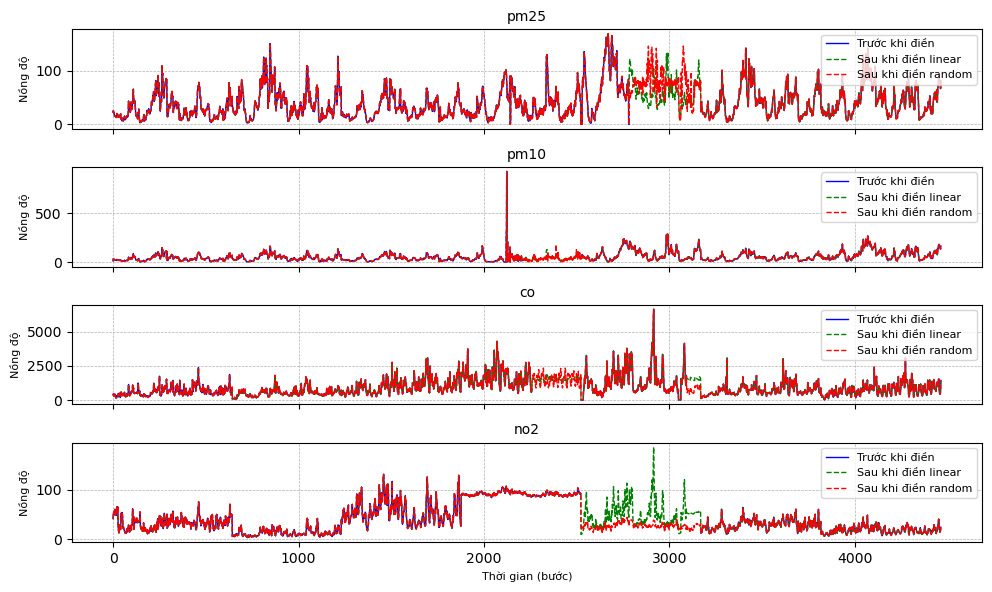

In [373]:
import matplotlib.pyplot as plt

pollutants = ["pm25", "pm10", "co", "no2"]

fig, axes = plt.subplots(4, 1, figsize=(10, 6), sharex=True)

for i, ax in enumerate(axes):
    pollutant = pollutants[i]
    y_real = df[pollutant]
    y_filled = df_linear[pollutant]
    y_filled1 = df_radom[pollutant]

    ax.plot(range(len(y_real)), y_real, label="Trước khi điền", color="blue", linewidth=1)
    ax.plot(range(len(y_filled)), y_filled, label="Sau khi điền linear", color="green", linestyle="dashed", linewidth=1)
    ax.plot(range(len(y_filled)), y_filled1, label="Sau khi điền random", color="red", linestyle="dashed", linewidth=1)

    ax.set_title(f"{pollutant}", fontsize=10)
    ax.set_ylabel("Nồng độ", fontsize=8)
    ax.legend(fontsize=8, loc="upper right")
    ax.grid(True, linestyle="--", linewidth=0.5)

axes[-1].set_xlabel("Thời gian (bước)", fontsize=8)

plt.tight_layout(pad=1.0)
plt.show()


# Xử lý outlier

### IQR

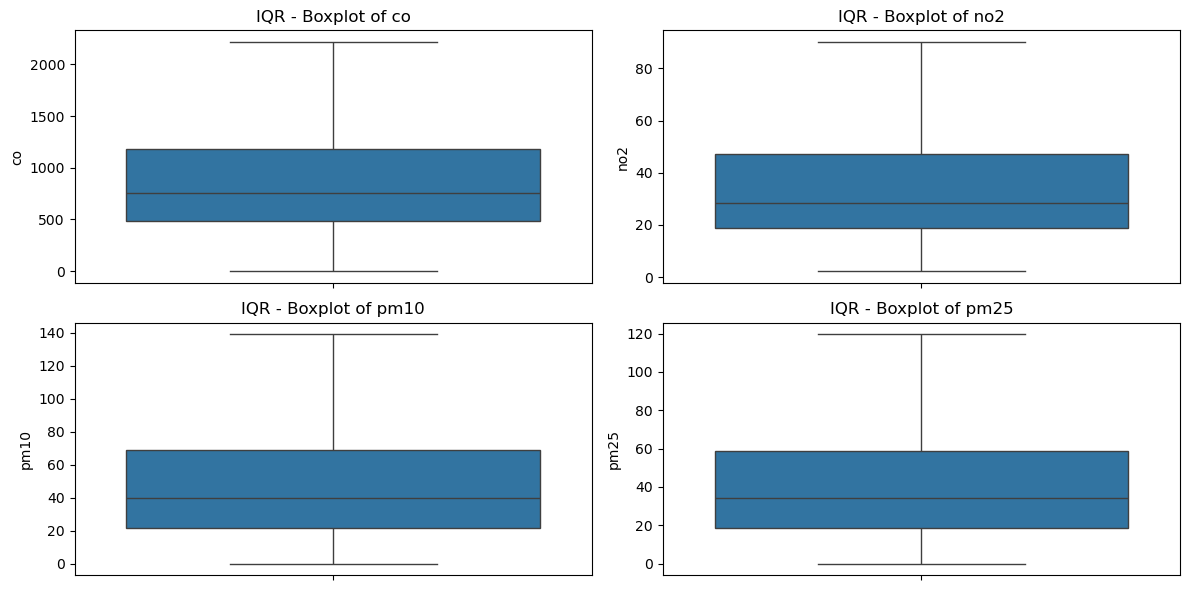

In [374]:
import matplotlib.pyplot as plt
import seaborn as sns

def remove_outliers_iqr(df, columns):
    df_filtered = df_radom.copy()
    for col in columns:
        Q1 = df_filtered[col].quantile(0.25)
        Q3 = df_filtered[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_filtered[col] = df_filtered[col].clip(lower=lower_bound, upper=upper_bound)
    return df_filtered


numerical_columns = ["co", "no2", "pm10", "pm25"]


df_final_iqr = remove_outliers_iqr(df_final, numerical_columns)


plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df_final_iqr[col])
    plt.title(f"IQR - Boxplot of {col}")
plt.tight_layout()
plt.show()


In [375]:
df_test1 = df_final_iqr.copy()


df_test1["datetimeUtc"] = pd.to_datetime(df_test1["datetimeUtc"])
df_test1["year"] = df_test1["datetimeUtc"].dt.year
df_test1["month"] = df_test1["datetimeUtc"].dt.month
df_test1["day"] = df_test1["datetimeUtc"].dt.day
df_test1["hour"] = df_test1["datetimeUtc"].dt.hour
df_test1["weekday"] = df_test1["datetimeUtc"].dt.weekday


le = LabelEncoder()
df_test1["location_name"] = le.fit_transform(df_test1["location_name"])


def create_lag_features(df, targets, n_lags=3):
    df_test1 = df.copy()
    for col in targets:
        for lag in range(1, n_lags + 1):
            df_test1[f"{col}_lag{lag}"] = df_test1[col].shift(lag)
    return df_test1.dropna()


targets = ["pm25", "pm10", "co", "no2"]
df_test1 = create_lag_features(df_test1, targets, n_lags=3)

features = ["year", "month", "day", "hour", "weekday", "location_name"]
features += [f"{col}_lag{i}" for col in targets for i in range(1, 4)]


models = {}
results = {}

for target in targets:
    X = df_test1[features]
    y = df_test1[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    models[target] = model

    y_pred = model.predict(X_test)
    results[target] = {
        "R²": r2_score(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
    }


for key, value in results.items():
    print(f"Đánh giá mô hình cho {key}:")
    print(f"  - R²: {value['R²']:.4f}")
    print(f"  - MSE: {value['MSE']:.4f}")
    print(f"  - MAE: {value['MAE']:.4f}")
    print("-" * 40)

df_test1.head()

Đánh giá mô hình cho pm25:
  - R²: 0.9266
  - MSE: 61.6009
  - MAE: 4.8751
----------------------------------------
Đánh giá mô hình cho pm10:
  - R²: 0.9025
  - MSE: 125.0295
  - MAE: 6.7642
----------------------------------------
Đánh giá mô hình cho co:
  - R²: 0.8890
  - MSE: 30003.1238
  - MAE: 119.6296
----------------------------------------
Đánh giá mô hình cho no2:
  - R²: 0.9751
  - MSE: 17.2517
  - MAE: 2.6564
----------------------------------------


,location_id,location_name,co,no2,pm10,pm25,datetimeUtc,latitude,longitude,year,...,pm25_lag3,pm10_lag1,pm10_lag2,pm10_lag3,co_lag1,co_lag2,co_lag3,no2_lag1,no2_lag2,no2_lag3
3,2161312.0,5,323.2,51.1,27.0,20.4,2025-02-01 04:00:00+00:00,21.2575,105.8514,2025,...,22.3,32.2,33.7,10.8,451.5,348.3,343.0,53.1,45.7,40.8
4,2161312.0,5,329.8,54.8,27.1,20.5,2025-02-01 05:00:00+00:00,21.2575,105.8514,2025,...,25.3,27.0,32.2,33.7,323.2,451.5,348.3,51.1,53.1,45.7
5,2161312.0,5,275.0,54.4,28.3,21.3,2025-02-01 06:00:00+00:00,21.2575,105.8514,2025,...,24.2,27.1,27.0,32.2,329.8,323.2,451.5,54.8,51.1,53.1
6,2161312.0,5,271.2,56.4,23.7,17.9,2025-02-01 07:00:00+00:00,21.2575,105.8514,2025,...,20.4,28.3,27.1,27.0,275.0,329.8,323.2,54.4,54.8,51.1
7,2161312.0,5,324.9,50.3,20.8,15.7,2025-02-01 08:00:00+00:00,21.2575,105.8514,2025,...,20.5,23.7,28.3,27.1,271.2,275.0,329.8,56.4,54.4,54.8


### Zscore

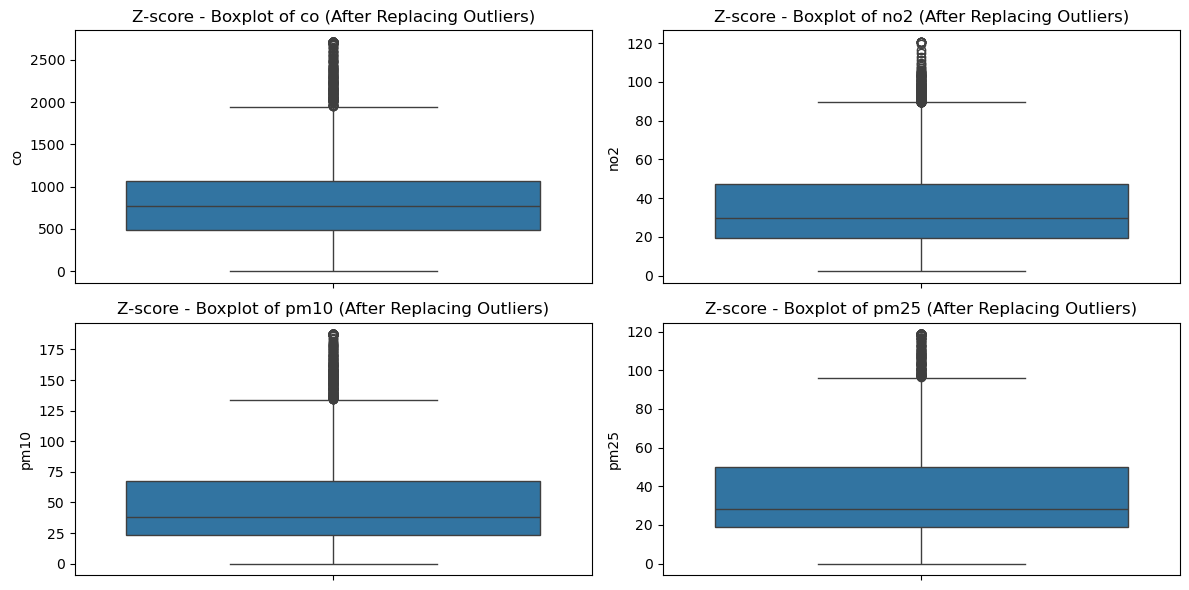

In [376]:
def replace_outliers_zscore(df, columns, threshold=3):
    df_filtered = df.copy()
    for col in columns:
        mean = df_filtered[col].mean()
        std = df_filtered[col].std()
        lower_bound = mean - threshold * std
        upper_bound = mean + threshold * std

        df_filtered[col] = df_filtered[col].clip(lower=lower_bound, upper=upper_bound)
    return df_filtered

numerical_columns = ["co", "no2", "pm10", "pm25"]

df_final_zscore = replace_outliers_zscore(df_final, numerical_columns)

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df_final_zscore[col])
    plt.title(f"Z-score - Boxplot of {col} (After Replacing Outliers)")
plt.tight_layout()
plt.show()

### So sánh IQR và Zscore

Số dòng ban đầu: 4466
Số dòng sau khi xử lý IQR: 4466
Số dòng sau khi xử lý Z-score: 4466


C:\Users\Pham Thanh\AppData\Local\Temp\ipykernel_16120\893927139.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Method", y="Value", data=df_plot[df_plot["Feature"] == col], palette="Set2")
C:\Users\Pham Thanh\AppData\Local\Temp\ipykernel_16120\893927139.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Method", y="Value", data=df_plot[df_plot["Feature"] == col], palette="Set2")
C:\Users\Pham Thanh\AppData\Local\Temp\ipykernel_16120\893927139.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Method", y="Value", data=df_pl

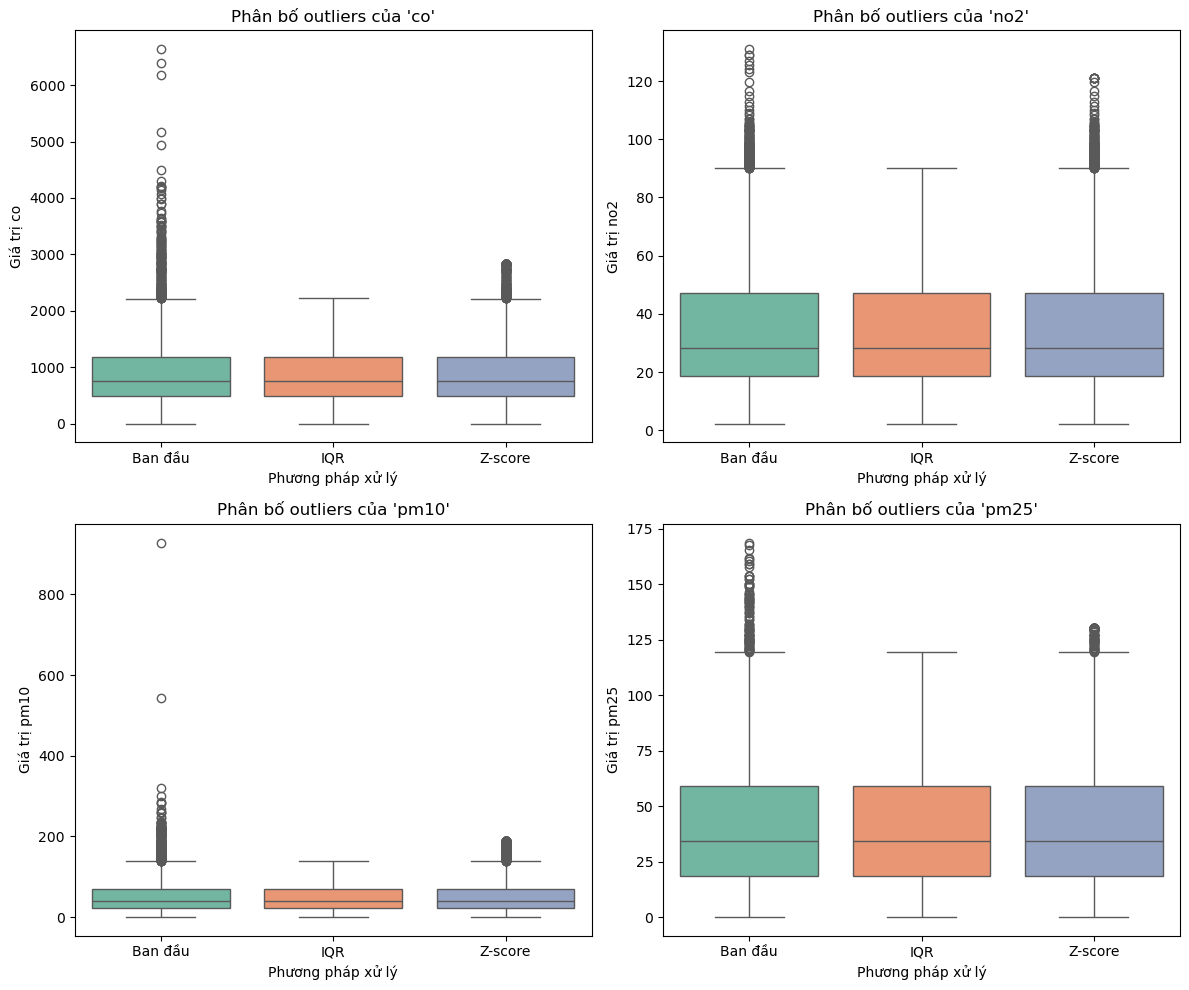

In [377]:
def replace_outliers_iqr(df_radom, columns):
    df_filtered = df_radom.copy()
    for col in columns:
        Q1 = df_filtered[col].quantile(0.25)
        Q3 = df_filtered[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_filtered[col] = df_filtered[col].clip(lower=lower_bound, upper=upper_bound)
    return df_filtered

def replace_outliers_zscore(df_radom, columns, threshold=3):
    df_filtered = df_radom.copy()
    for col in columns:
        mean = df_filtered[col].mean()
        std = df_filtered[col].std()
        if std == 0:
            continue
        lower_bound = mean - threshold * std
        upper_bound = mean + threshold * std
        df_filtered[col] = df_filtered[col].clip(lower=lower_bound, upper=upper_bound)
    return df_filtered

numerical_columns = ["co", "no2", "pm10", "pm25"]

df_final_iqr = replace_outliers_iqr(df_radom, numerical_columns)
df_final_zscore = replace_outliers_zscore(df_radom, numerical_columns)

print("Số dòng ban đầu:", len(df_radom))
print("Số dòng sau khi xử lý IQR:", len(df_final_iqr))
print("Số dòng sau khi xử lý Z-score:", len(df_final_zscore))

df_plot = pd.concat([
    pd.DataFrame({"Value": df_radom[col], "Method": "Ban đầu", "Feature": col}) for col in numerical_columns
] + [
    pd.DataFrame({"Value": df_final_iqr[col], "Method": "IQR", "Feature": col}) for col in numerical_columns
] + [
    pd.DataFrame({"Value": df_final_zscore[col], "Method": "Z-score", "Feature": col}) for col in numerical_columns
])

plt.figure(figsize=(12, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x="Method", y="Value", data=df_plot[df_plot["Feature"] == col], palette="Set2")
    plt.title(f"Phân bố outliers của '{col}'")
    plt.xlabel("Phương pháp xử lý")
    plt.ylabel(f"Giá trị {col}")

plt.tight_layout()
plt.show()


### winsorization

Số dòng ban đầu: 4466
Số dòng sau khi áp dụng Winsorization: 4466


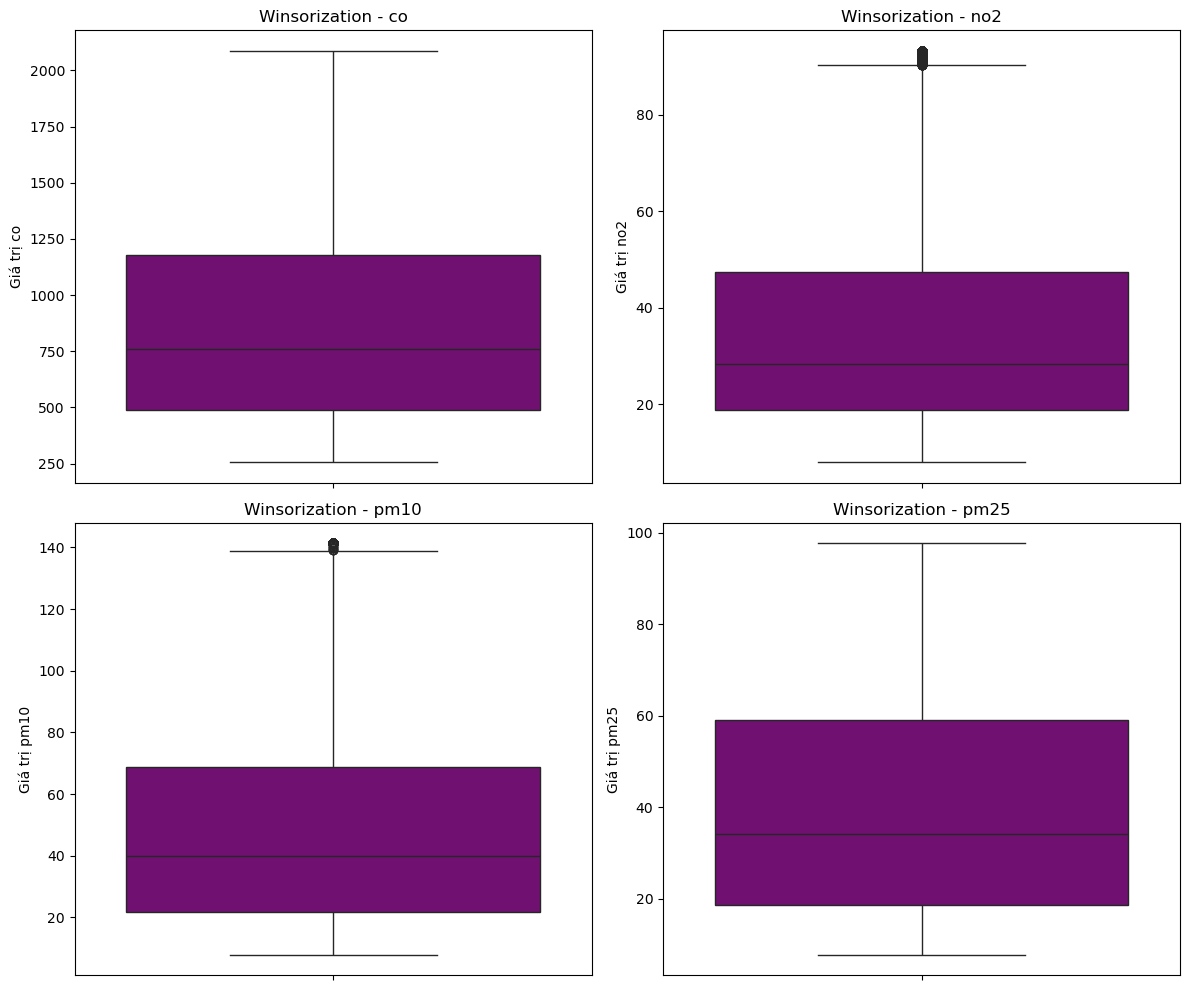

In [378]:
def winsorization(df, columns, lower_quantile=0.05, upper_quantile=0.95):
    df_winsorized = df_radom.copy()
    for col in columns:
        lower_bound = df_winsorized[col].quantile(lower_quantile)
        upper_bound = df_winsorized[col].quantile(upper_quantile)
        df_winsorized[col] = np.clip(df_winsorized[col], lower_bound, upper_bound)
    return df_winsorized

numerical_columns = ["co", "no2", "pm10", "pm25"]

df_final_winsorized = winsorization(df_final, numerical_columns)


print("Số dòng ban đầu:", len(df_final))
print("Số dòng sau khi áp dụng Winsorization:", len(df_final_winsorized))

plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df_final_winsorized[col], color="purple")
    plt.title(f"Winsorization - {col}")
    plt.ylabel(f"Giá trị {col}")
plt.tight_layout()
plt.show()

In [379]:
df3 = df_final_winsorized.copy()


df3["datetimeUtc"] = pd.to_datetime(df3["datetimeUtc"])
df3["year"] = df3["datetimeUtc"].dt.year
df3["month"] = df3["datetimeUtc"].dt.month
df3["day"] = df3["datetimeUtc"].dt.day
df3["hour"] = df3["datetimeUtc"].dt.hour
df3["weekday"] = df3["datetimeUtc"].dt.weekday


le = LabelEncoder()
df3["location_name"] = le.fit_transform(df3["location_name"])


def create_lag_features(df, targets, n_lags=3):
    df3 = df.copy()
    for col in targets:
        for lag in range(1, n_lags + 1):
            df3[f"{col}_lag{lag}"] = df3[col].shift(lag)
    return df3.dropna()


targets = ["pm25", "pm10", "co", "no2"]
df3 = create_lag_features(df3, targets, n_lags=3)

features = ["year", "month", "day", "hour", "weekday", "location_name"]
features += [f"{col}_lag{i}" for col in targets for i in range(1, 4)]


models = {}
results = {}

for target in targets:
    X = df3[features]
    y = df3[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    models[target] = model

    y_pred = model.predict(X_test)
    results[target] = {
        "R²": r2_score(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
    }


for key, value in results.items():
    print(f"Đánh giá mô hình cho {key}:")
    print(f"  - R²: {value['R²']:.4f}")
    print(f"  - MSE: {value['MSE']:.4f}")
    print(f"  - MAE: {value['MAE']:.4f}")
    print("-" * 40)

df3.head()

Đánh giá mô hình cho pm25:
  - R²: 0.9264
  - MSE: 53.4609
  - MAE: 4.5974
----------------------------------------
Đánh giá mô hình cho pm10:
  - R²: 0.9046
  - MSE: 123.0599
  - MAE: 6.7190
----------------------------------------
Đánh giá mô hình cho co:
  - R²: 0.8882
  - MSE: 28187.4332
  - MAE: 115.8394
----------------------------------------
Đánh giá mô hình cho no2:
  - R²: 0.9753
  - MSE: 17.5556
  - MAE: 2.6948
----------------------------------------


,location_id,location_name,co,no2,pm10,pm25,datetimeUtc,latitude,longitude,year,...,pm25_lag3,pm10_lag1,pm10_lag2,pm10_lag3,co_lag1,co_lag2,co_lag3,no2_lag1,no2_lag2,no2_lag3
3,2161312.0,5,323.2,51.1,27.0,20.4,2025-02-01 04:00:00+00:00,21.2575,105.8514,2025,...,22.3,32.2,33.7,10.8,451.5,348.3,343.0,53.1,45.7,40.8
4,2161312.0,5,329.8,54.8,27.1,20.5,2025-02-01 05:00:00+00:00,21.2575,105.8514,2025,...,25.3,27.0,32.2,33.7,323.2,451.5,348.3,51.1,53.1,45.7
5,2161312.0,5,275.0,54.4,28.3,21.3,2025-02-01 06:00:00+00:00,21.2575,105.8514,2025,...,24.2,27.1,27.0,32.2,329.8,323.2,451.5,54.8,51.1,53.1
6,2161312.0,5,271.2,56.4,23.7,17.9,2025-02-01 07:00:00+00:00,21.2575,105.8514,2025,...,20.4,28.3,27.1,27.0,275.0,329.8,323.2,54.4,54.8,51.1
7,2161312.0,5,324.9,50.3,20.8,15.7,2025-02-01 08:00:00+00:00,21.2575,105.8514,2025,...,20.5,23.7,28.3,27.1,271.2,275.0,329.8,56.4,54.4,54.8


### capping outliers

capping outliers lower=0.10, upper=0.90

Số dòng ban đầu: 4466
Số dòng sau khi capping outliers: 4466


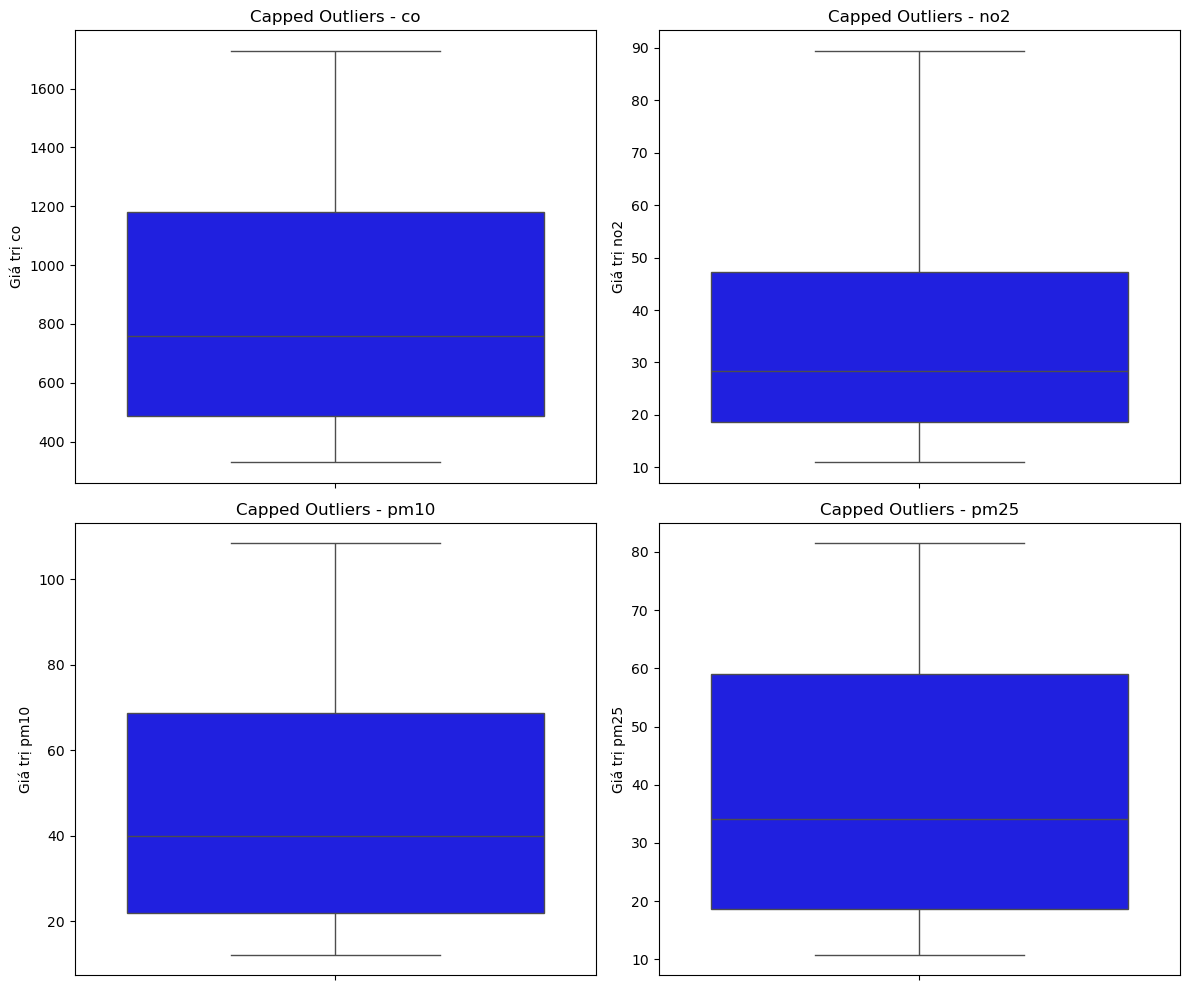

In [380]:
def cap_outliers(df, columns, lower=0.10, upper=0.90):
    df_capped = df_radom.copy()
    for col in columns:
        lower_bound = df_capped[col].quantile(lower)
        upper_bound = df_capped[col].quantile(upper)
        df_capped[col] = np.clip(df_capped[col], lower_bound, upper_bound)
    return df_capped

# Các cột số cần xử lý outliers
numerical_columns = ["co", "no2", "pm10", "pm25"]

# Áp dụng phương pháp capping outliers
df_final_capped = cap_outliers(df_final, numerical_columns)

# So sánh số lượng dữ liệu còn lại
print("Số dòng ban đầu:", len(df_final))
print("Số dòng sau khi capping outliers:", len(df_final_capped))

# Trực quan hóa dữ liệu sau khi biến đổi outliers
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df_final_capped[col], color="blue")
    plt.title(f"Capped Outliers - {col}")
    plt.ylabel(f"Giá trị {col}")
plt.tight_layout()
plt.show()


In [381]:
df4 = df_final_capped.copy()


df4["datetimeUtc"] = pd.to_datetime(df4["datetimeUtc"])
df4["year"] = df4["datetimeUtc"].dt.year
df4["month"] = df4["datetimeUtc"].dt.month
df4["day"] = df4["datetimeUtc"].dt.day
df4["hour"] = df4["datetimeUtc"].dt.hour
df4["weekday"] = df4["datetimeUtc"].dt.weekday


le = LabelEncoder()
df4["location_name"] = le.fit_transform(df4["location_name"])


def create_lag_features(df, targets, n_lags=3):
    df4 = df.copy()
    for col in targets:
        for lag in range(1, n_lags + 1):
            df4[f"{col}_lag{lag}"] = df4[col].shift(lag)
    return df4.dropna()


targets = ["pm25", "pm10", "co", "no2"]
df4 = create_lag_features(df4, targets, n_lags=3)

features = ["year", "month", "day", "hour", "weekday", "location_name"]
features += [f"{col}_lag{i}" for col in targets for i in range(1, 4)]


models = {}
results = {}

for target in targets:
    X = df4[features]
    y = df4[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    models[target] = model

    y_pred = model.predict(X_test)
    results[target] = {
        "R²": r2_score(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
    }


for key, value in results.items():
    print(f"Đánh giá mô hình cho {key}:")
    print(f"  - R²: {value['R²']:.4f}")
    print(f"  - MSE: {value['MSE']:.4f}")
    print(f"  - MAE: {value['MAE']:.4f}")
    print("-" * 40)

df4.head()


Đánh giá mô hình cho pm25:
  - R²: 0.9257
  - MSE: 43.8689
  - MAE: 4.0821
----------------------------------------
Đánh giá mô hình cho pm10:
  - R²: 0.9002
  - MSE: 93.8836
  - MAE: 5.9359
----------------------------------------
Đánh giá mô hình cho co:
  - R²: 0.8818
  - MSE: 24029.0492
  - MAE: 106.7436
----------------------------------------
Đánh giá mô hình cho no2:
  - R²: 0.9746
  - MSE: 16.9677
  - MAE: 2.5990
----------------------------------------


,location_id,location_name,co,no2,pm10,pm25,datetimeUtc,latitude,longitude,year,...,pm25_lag3,pm10_lag1,pm10_lag2,pm10_lag3,co_lag1,co_lag2,co_lag3,no2_lag1,no2_lag2,no2_lag3
3,2161312.0,5,330.1,51.1,27.0,20.4,2025-02-01 04:00:00+00:00,21.2575,105.8514,2025,...,22.3,32.2,33.7,12.14,451.5,348.3,343.0,53.1,45.7,40.8
4,2161312.0,5,330.1,54.8,27.1,20.5,2025-02-01 05:00:00+00:00,21.2575,105.8514,2025,...,25.3,27.0,32.2,33.70,330.1,451.5,348.3,51.1,53.1,45.7
5,2161312.0,5,330.1,54.4,28.3,21.3,2025-02-01 06:00:00+00:00,21.2575,105.8514,2025,...,24.2,27.1,27.0,32.20,330.1,330.1,451.5,54.8,51.1,53.1
6,2161312.0,5,330.1,56.4,23.7,17.9,2025-02-01 07:00:00+00:00,21.2575,105.8514,2025,...,20.4,28.3,27.1,27.00,330.1,330.1,330.1,54.4,54.8,51.1
7,2161312.0,5,330.1,50.3,20.8,15.7,2025-02-01 08:00:00+00:00,21.2575,105.8514,2025,...,20.5,23.7,28.3,27.10,330.1,330.1,330.1,56.4,54.4,54.8


capping outliers lower=0.088, upper=0.912

Số dòng ban đầu: 4466
Số dòng sau khi capping outliers: 4466


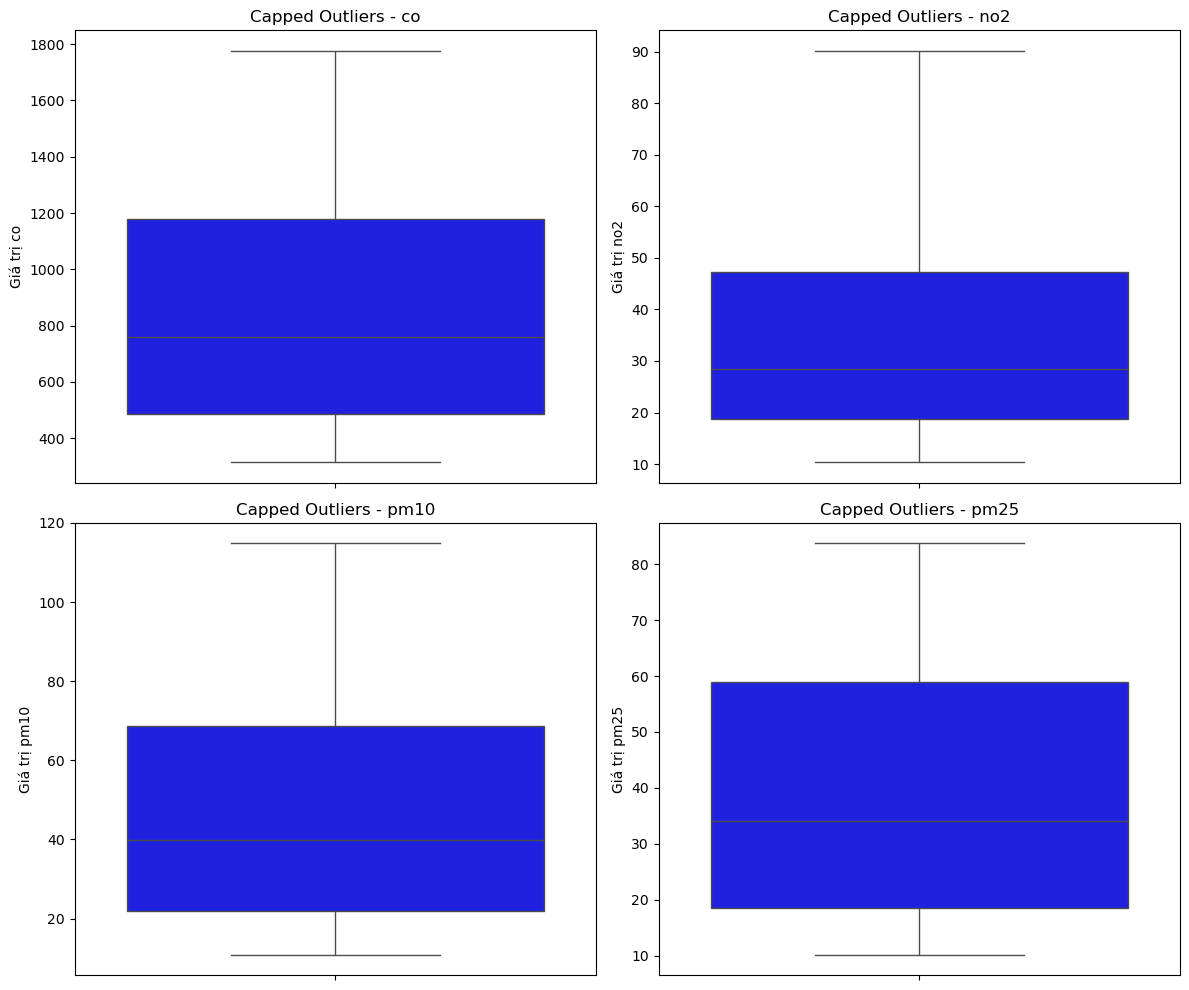

In [382]:
def cap_outliers(df, columns, lower=0.088, upper=0.912):
    df_capped = df_radom.copy()
    for col in columns:
        lower_bound = df_capped[col].quantile(lower)
        upper_bound = df_capped[col].quantile(upper)
        df_capped[col] = np.clip(df_capped[col], lower_bound, upper_bound)
    return df_capped

# Các cột số cần xử lý outliers
numerical_columns = ["co", "no2", "pm10", "pm25"]

# Áp dụng phương pháp capping outliers
df_final_capped = cap_outliers(df_final, numerical_columns)

# So sánh số lượng dữ liệu còn lại
print("Số dòng ban đầu:", len(df_final))
print("Số dòng sau khi capping outliers:", len(df_final_capped))

# Trực quan hóa dữ liệu sau khi biến đổi outliers
plt.figure(figsize=(12, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df_final_capped[col], color="blue")
    plt.title(f"Capped Outliers - {col}")
    plt.ylabel(f"Giá trị {col}")
plt.tight_layout()
plt.show()


In [383]:
df5 = df_final_winsorized.copy()


df5["datetimeUtc"] = pd.to_datetime(df5["datetimeUtc"])
df5["year"] = df5["datetimeUtc"].dt.year
df5["month"] = df5["datetimeUtc"].dt.month
df5["day"] = df5["datetimeUtc"].dt.day
df5["hour"] = df5["datetimeUtc"].dt.hour
df5["weekday"] = df5["datetimeUtc"].dt.weekday


le = LabelEncoder()
df5["location_name"] = le.fit_transform(df5["location_name"])


def create_lag_features(df, targets, n_lags=3):
    df5 = df.copy()
    for col in targets:
        for lag in range(1, n_lags + 1):
            df5[f"{col}_lag{lag}"] = df5[col].shift(lag)
    return df5.dropna()


targets = ["pm25", "pm10", "co", "no2"]
df5 = create_lag_features(df5, targets, n_lags=3)

features = ["year", "month", "day", "hour", "weekday", "location_name"]
features += [f"{col}_lag{i}" for col in targets for i in range(1, 4)]


models = {}
results = {}

for target in targets:
    X = df5[features]
    y = df5[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    models[target] = model

    y_pred = model.predict(X_test)
    results[target] = {
        "R²": r2_score(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
    }


for key, value in results.items():
    print(f"Đánh giá mô hình cho {key}:")
    print(f"  - R²: {value['R²']:.4f}")
    print(f"  - MSE: {value['MSE']:.4f}")
    print(f"  - MAE: {value['MAE']:.4f}")
    print("-" * 40)
df5.to_csv("df5_lagged.csv", index=False)
df5.head()

Đánh giá mô hình cho pm25:
  - R²: 0.9264
  - MSE: 53.4609
  - MAE: 4.5974
----------------------------------------
Đánh giá mô hình cho pm10:
  - R²: 0.9046
  - MSE: 123.0599
  - MAE: 6.7190
----------------------------------------
Đánh giá mô hình cho co:
  - R²: 0.8882
  - MSE: 28187.4332
  - MAE: 115.8394
----------------------------------------
Đánh giá mô hình cho no2:
  - R²: 0.9753
  - MSE: 17.5556
  - MAE: 2.6948
----------------------------------------


,location_id,location_name,co,no2,pm10,pm25,datetimeUtc,latitude,longitude,year,...,pm25_lag3,pm10_lag1,pm10_lag2,pm10_lag3,co_lag1,co_lag2,co_lag3,no2_lag1,no2_lag2,no2_lag3
3,2161312.0,5,323.2,51.1,27.0,20.4,2025-02-01 04:00:00+00:00,21.2575,105.8514,2025,...,22.3,32.2,33.7,10.8,451.5,348.3,343.0,53.1,45.7,40.8
4,2161312.0,5,329.8,54.8,27.1,20.5,2025-02-01 05:00:00+00:00,21.2575,105.8514,2025,...,25.3,27.0,32.2,33.7,323.2,451.5,348.3,51.1,53.1,45.7
5,2161312.0,5,275.0,54.4,28.3,21.3,2025-02-01 06:00:00+00:00,21.2575,105.8514,2025,...,24.2,27.1,27.0,32.2,329.8,323.2,451.5,54.8,51.1,53.1
6,2161312.0,5,271.2,56.4,23.7,17.9,2025-02-01 07:00:00+00:00,21.2575,105.8514,2025,...,20.4,28.3,27.1,27.0,275.0,329.8,323.2,54.4,54.8,51.1
7,2161312.0,5,324.9,50.3,20.8,15.7,2025-02-01 08:00:00+00:00,21.2575,105.8514,2025,...,20.5,23.7,28.3,27.1,271.2,275.0,329.8,56.4,54.4,54.8


# Trực quan hóa dữ liệu

In [384]:
df6 = df5.copy() 
o_location_name = df["location_name"].copy()
df6["location_name"] = o_location_name
df_filtered = df6.iloc[:, :9]
df_filtered.head()

,location_id,location_name,co,no2,pm10,pm25,datetimeUtc,latitude,longitude
3,2161312.0,Xuân Tảo,323.2,51.1,27.0,20.4,2025-02-01 04:00:00+00:00,21.2575,105.8514
4,2161312.0,Xuân Tảo,329.8,54.8,27.1,20.5,2025-02-01 05:00:00+00:00,21.2575,105.8514
5,2161312.0,Xuân Tảo,275.0,54.4,28.3,21.3,2025-02-01 06:00:00+00:00,21.2575,105.8514
6,2161312.0,Xuân Tảo,271.2,56.4,23.7,17.9,2025-02-01 07:00:00+00:00,21.2575,105.8514
7,2161312.0,Xuân Tảo,324.9,50.3,20.8,15.7,2025-02-01 08:00:00+00:00,21.2575,105.8514


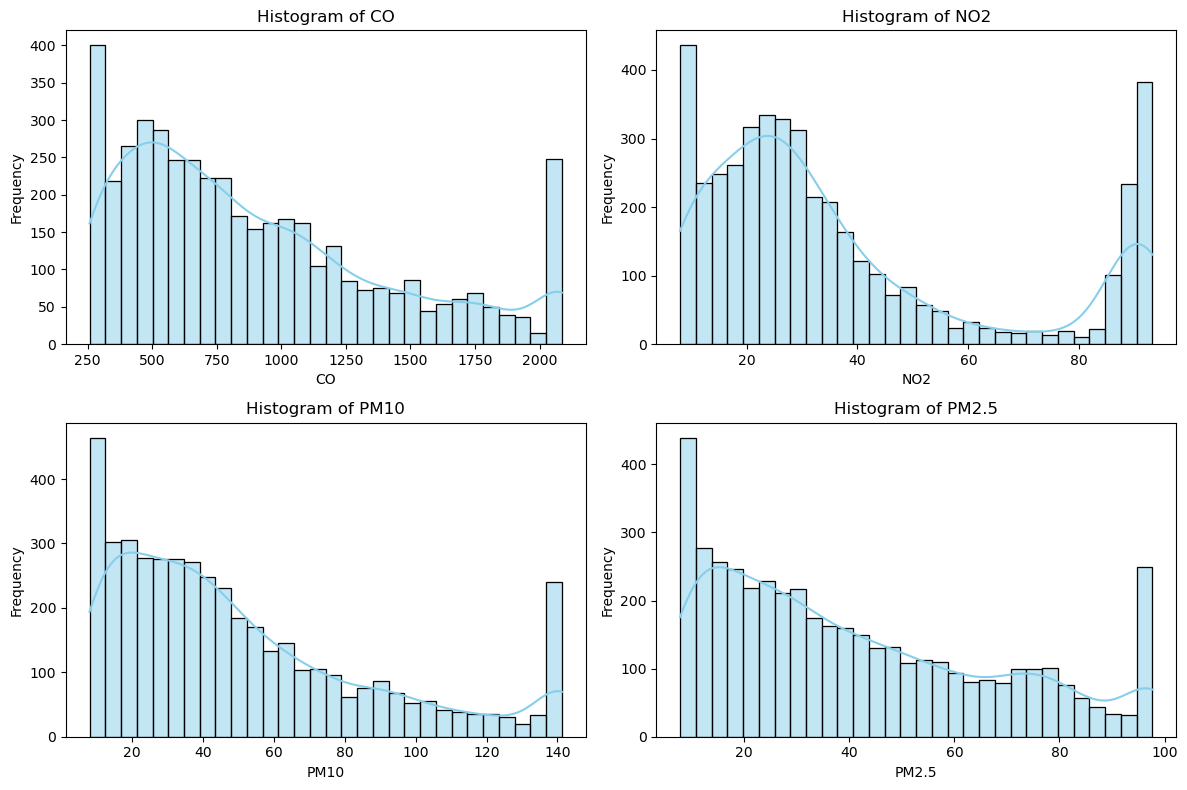

In [385]:
plt.figure(figsize=(12, 8))

pollutants = ["co", "no2", "pm10", "pm25"]
titles = ["CO", "NO2", "PM10", "PM2.5"]

for i, col in enumerate(pollutants, 1):
    plt.subplot(2, 2, i)  # 2 hàng, 2 cột
    sns.histplot(df_filtered[col], bins=30, kde=True, color="skyblue")  # KDE để hiển thị đường phân bố
    plt.title(f"Histogram of {titles[i-1]}")
    plt.xlabel(titles[i-1])
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Model

In [386]:
import tkinter as tk
from tkinter import messagebox

def categorize(value, low, high):
    if value <= low:
        return "Tốt"
    elif value <= high:
        return "Trung bình"
    return "Xấu"

def classify_cluster_v4(pm25, pm10, no2, co):
    categories = {
        "pm25": categorize(pm25, 20, 50),
        "pm10": categorize(pm10, 25, 70),
        "no2": categorize(no2, 20, 50),
        "co": categorize(co, 500, 1000),
    }
    
    good_count = list(categories.values()).count("Tốt")
    bad_count = list(categories.values()).count("Xấu")
    
    if good_count >= 3:
        return "Cụm Tốt"
    if bad_count >= 3:
        return "Cụm Xấu"
    if good_count == 2 and bad_count == 2:
        for attr in ["pm25", "no2", "pm10", "co"]:
            if categories[attr] == "Xấu":
                return "Cụm Xấu"
        return "Cụm Tốt"
    return "Cụm Trung bình"


def get_cluster():
    try:
        pm25 = float(entry_pm25.get())
        pm10 = float(entry_pm10.get())
        no2 = float(entry_no2.get())
        co = float(entry_co.get())
        cluster = classify_cluster_v4(pm25, pm10, no2, co)
        messagebox.showinfo("Kết quả", f"Dữ liệu thuộc: {cluster}")
    except ValueError:
        messagebox.showerror("Lỗi", "Vui lòng nhập số hợp lệ")

root = tk.Tk()
root.title("Phân cụm chất lượng không khí")

tk.Label(root, text="Nhập giá trị PM2.5:").grid(row=0, column=0)
entry_pm25 = tk.Entry(root)
entry_pm25.grid(row=0, column=1)

tk.Label(root, text="Nhập giá trị PM10:").grid(row=1, column=0)
entry_pm10 = tk.Entry(root)
entry_pm10.grid(row=1, column=1)

tk.Label(root, text="Nhập giá trị NO2:").grid(row=2, column=0)
entry_no2 = tk.Entry(root)
entry_no2.grid(row=2, column=1)

tk.Label(root, text="Nhập giá trị CO:").grid(row=3, column=0)
entry_co = tk.Entry(root)
entry_co.grid(row=3, column=1)

tk.Button(root, text="Xác định cụm", command=get_cluster).grid(row=4, columnspan=2)

root.mainloop()

In [387]:
import joblib

df = df_filtered.copy()

df["datetimeUtc"] = pd.to_datetime(df["datetimeUtc"])
df["year"] = df["datetimeUtc"].dt.year
df["month"] = df["datetimeUtc"].dt.month
df["day"] = df["datetimeUtc"].dt.day
df["hour"] = df["datetimeUtc"].dt.hour
df["weekday"] = df["datetimeUtc"].dt.weekday

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["location_name"] = le.fit_transform(df["location_name"])

def create_lag_features(df, targets, n_lags=3):
    df_lagged = df.copy()
    for col in targets:
        for lag in range(1, n_lags + 1):
            df_lagged[f"{col}_lag{lag}"] = df_lagged[col].shift(lag)
    return df_lagged.dropna()  

targets = ["pm25", "pm10", "co", "no2"]

df = create_lag_features(df, targets, n_lags=3)

features = ["hour", "weekday", "location_name"]
features += [f"{col}_lag{i}" for col in targets for i in range(1, 4)]

models = {}
results = {}

for target in targets:
    print(f"Huấn luyện mô hình dự báo {target}...")

    X = df[features]  
    y = df[target]    

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)  

    y_pred = model.predict(X_test)

    results[target] = {
        "R²": r2_score(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
    }

    joblib.dump(model, f"{target}_model.pkl")
    models[target] = model

    print(f"Hoàn thành {target}: R² = {results[target]['R²']:.4f}, MSE = {results[target]['MSE']:.2f}")

print("\n**Kết quả đánh giá mô hình:**")
for key, value in results.items():
    print(f" {key}: R²={value['R²']:.4f}, MSE={value['MSE']:.2f}, MAE={value['MAE']:.2f}")

print("\nHoàn thành! Mô hình đã sẵn sàng để dự báo trong Tkinter.")
o_location_name = df_filtered["location_name"].copy()
df["location_name"] = o_location_name
dft = df.copy()

Huấn luyện mô hình dự báo pm25...
Hoàn thành pm25: R² = 0.9311, MSE = 48.25
Huấn luyện mô hình dự báo pm10...
Hoàn thành pm10: R² = 0.9064, MSE = 127.28
Huấn luyện mô hình dự báo co...
Hoàn thành co: R² = 0.8807, MSE = 32217.23
Huấn luyện mô hình dự báo no2...
Hoàn thành no2: R² = 0.9707, MSE = 21.66

**Kết quả đánh giá mô hình:**
 pm25: R²=0.9311, MSE=48.25, MAE=4.30
 pm10: R²=0.9064, MSE=127.28, MAE=6.46
 co: R²=0.8807, MSE=32217.23, MAE=122.71
 no2: R²=0.9707, MSE=21.66, MAE=2.86

Hoàn thành! Mô hình đã sẵn sàng để dự báo trong Tkinter.


In [388]:
df = dft.copy()

# Xử lý dữ liệu thời gian
df["datetimeUtc"] = pd.to_datetime(df["datetimeUtc"])
df["hour"] = df["datetimeUtc"].dt.hour
df["weekday"] = df["datetimeUtc"].dt.weekday
# Lưu mapping từ tên sang số
location_mapping = {name: idx for idx, name in enumerate(df["location_name"].unique())}
reverse_location_mapping = {v: k for k, v in location_mapping.items()}

# Mã hóa location_name bằng số
df["location_name"] = df["location_name"].map(location_mapping)

# Lấy danh sách khu vực (dạng chữ)
area_list = sorted(location_mapping.keys())

# Tải mô hình đã huấn luyện
models = {
    "pm25": joblib.load("pm25_model.pkl"),
    "pm10": joblib.load("pm10_model.pkl"),
    "co": joblib.load("co_model.pkl"),
    "no2": joblib.load("no2_model.pkl"),
}

# Hàm phân loại chất lượng không khí
def categorize(value, low, high):
    if value <= low:
        return "Tốt"
    elif value <= high:
        return "Trung bình"
    return "Xấu"

def classify_air_quality(pm25, pm10, no2, co):
    categories = {
        "pm25": categorize(pm25, 20, 50),
        "pm10": categorize(pm10, 25, 70),
        "no2": categorize(no2, 20, 50),
        "co": categorize(co, 500, 1000),
    }
    
    good_count = list(categories.values()).count("Tốt")
    bad_count = list(categories.values()).count("Xấu")
    
    if good_count >= 3:
        return "Chất lượng không khí Tốt"
    if bad_count >= 3:
        return "Chất lượng không khí Xấu"
    if good_count == 2 and bad_count == 2:
        for attr in ["pm25", "no2", "pm10", "co"]:
            if categories[attr] == "Xấu":
                return "Chất lượng không khí Xấu"
        return "Chất lượng không khí Tốt"
    return "Chất lượng không khí Trung bình"

# Hàm dự đoán chỉ số ô nhiễm
def predict():
    try:
        selected_area_name = area_var.get()  # Lấy tên khu vực từ Combobox
        if selected_area_name not in location_mapping:
            messagebox.showerror("Lỗi", "Vui lòng chọn khu vực hợp lệ!")
            return

        selected_area = location_mapping[selected_area_name]  # Chuyển thành số

        
        try:
            selected_hour = int(hour_var.get())
            if selected_hour < 0 or selected_hour > 23:
                messagebox.showerror("Lỗi", "Giờ phải từ 0 đến 23!")
                return
        except ValueError:
            messagebox.showerror("Lỗi", "Vui lòng nhập số nguyên từ 0 đến 23!")
            return

        # Lọc dữ liệu phù hợp với đầu vào
        df_filtered = df[(df["location_name"] == selected_area) & (df["hour"] == selected_hour)]

        if df_filtered.empty:
            messagebox.showerror("Lỗi", "Không có dữ liệu phù hợp với lựa chọn!")
            return

        # Xác định các cột đặc trưng
        features = ["hour", "weekday", "location_name"]
        features += [f"{col}_lag{i}" for col in models.keys() for i in range(1, 4)]
        available_features = [col for col in features if col in df_filtered.columns]
        X = df_filtered[available_features]

        # Dự đoán giá trị cho từng chỉ số ô nhiễm
        predictions = {}
        for target, model in models.items():
            pred = model.predict(X)[0]  
            predictions[target] = round(pred, 2)  

        # Phân loại chất lượng không khí
        air_quality = classify_air_quality(
            predictions["pm25"], predictions["pm10"], predictions["no2"], predictions["co"]
        )

        # Hiển thị 
        air_quality_map = {
            "Chất lượng không khí Tốt": "Tốt",
            "Chất lượng không khí Trung bình": "Trung bình",
            "Chất lượng không khí Xấu": "Xấu",
        }
        air_quality_display = air_quality_map.get(air_quality, "Không xác định")

        # Hiển thị kết quả trên giao diện
        results_text = (
            f"PM2.5: {predictions['pm25']} µg/m³\n"
            f"PM10: {predictions['pm10']} µg/m³\n"
            f"NO2: {predictions['no2']} µg/m³\n"
            f"CO: {predictions['co']} µg/m³\n\n"
            f"Chất lượng không khí: {air_quality_display}"
        )
        result_label.config(text=results_text)

    except Exception as e:
        messagebox.showerror("Lỗi", str(e))

# Tạo giao diện Tkinter
root = tk.Tk()
root.title("Dự đoán chỉ số ô nhiễm")
root.geometry("400x350")

tk.Label(root, text="Chọn khu vực:").pack()
area_var = tk.StringVar()
area_menu = ttk.Combobox(root, textvariable=area_var, values=area_list, state="readonly")
area_menu.pack()

tk.Label(root, text="Nhập giờ (0-23):").pack()
hour_var = tk.StringVar()
hour_entry = tk.Entry(root, textvariable=hour_var)
hour_entry.pack()

btn_predict = tk.Button(root, text="Dự đoán", command=predict)
btn_predict.pack(pady=20)

result_label = tk.Label(root, text="", justify="left")
result_label.pack(pady=10)

root.mainloop()
